# 0.0 Imports

In [1]:
import inflection
import seaborn                     as sns
import pandas                      as pd
import numpy                       as np
import scikitplot                  as skplt


from matplotlib            import pyplot          as plt
from sklearn               import preprocessing   as pp
from sklearn               import model_selection as mms
from sklearn               import ensemble        as en
from sklearn               import neighbors       as nh
from sklearn               import linear_model    as lm

from sklearn.ensemble      import RandomForestClassifier, GradientBoostingClassifier
from lightgbm              import LGBMClassifier
from sklearn.naive_bayes   import GaussianNB

#from sklearn.ensemble import ExtraTreesClassifier


from IPython.core.display  import HTML
from IPython.display       import Image
from pandas_profiling      import ProfileReport
from tabulate              import tabulate

from scipy                   import stats
from sklearn.model_selection import StratifiedKFold , train_test_split


import pickle5 as pickle

## 0.1 Helper Functions

In [2]:
df_test_raw = pd.read_csv("/Users/raquelrocha/documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/data/test.csv",low_memory = False)

# arquivo bruto
# Raw seria a marcação de arquivo que não foi limpo ainda (acabou de ler)
df_train_raw = pd.read_csv("/Users/raquelrocha/documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/data/train.csv",low_memory = False)
#df_sample_raw = pd.read_csv("/Users/raquelrocha/documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/data/sample_submission.csv",low_memory = False)


In [3]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

sns.set()

In [4]:
jupyter_settings()

In [5]:
df_test_raw.head()
#df_train_raw.info()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


## 0.2 Loading Data

In [6]:
df_train_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
# Merge (método da classe pandas) 1arg- documento que será referencia 2arg- arquivo que será anexado how:como fará e on a coluna em comum
#df_raw = pd.merge(df_train_raw, df_sample_raw, how="left", on="id")
df_raw = df_train_raw


# # Split Data into Train & Test (85/15)


In [8]:
# Divide into X and y
# X_raw = df_raw.drop('Response', axis=1)
# y_raw = df_raw['Response'].copy()

In [9]:
# Split into Train & Test
# x_df1, x_test, y_df1, y_test = train_test_split(X_raw, y_raw, test_size=0.15, random_state=42)

In [10]:
# Concatenate X and y of Train dataset , deixa test de fora desses arquivos
# df1 = pd.concat([x_df1, y_df1], axis=1).reset_index(drop=True)

# 1.0 Data Descrition

In [8]:
#fazer cópia dos dados, para não usar em cima do original
df1 = df_raw.copy()

In [9]:
df_raw.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

## 1.1 Rename Columns

In [10]:
cols_old = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
            'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
            'Policy_Sales_Channel', 'Vintage', 'Response', ]
#response_y
#Colocar em letra minúscula e snakecase
snakecase = lambda x: inflection.underscore (x)
cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new


In [11]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.2 Data Dimensions

In [12]:
print("Number of Rows:{}".format(df1.shape[0]))
print("Number of Cols:{}".format(df1.shape[1]))

Number of Rows:381109
Number of Cols:12


## 1.3 Data Types

In [13]:
# descobrir os tipos dos dados
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

In [14]:
#df1.drop("response_y", axis=1, inplace=True)


In [15]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.4 Check NA

In [16]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5 Fillout NA (Substituindo os dados faltantes)

## 1.6 Change Types (Estatística Descritiva)

In [17]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

In [18]:
df1["region_code"]=df1["region_code"].astype(int)
#df1["annual_premium"]=df1["annual_premium"].astype(int)
df1["policy_sales_channel"]=df1["policy_sales_channel"].astype(int)

In [19]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code               int64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel      int64
vintage                   int64
response                  int64
dtype: object

## 1.7 Descriptive Statistical

In [20]:
#númerico
num_attributes = df1[["age", "annual_premium", "vintage"]]
#categórico
cat_attributes = df1[["gender", "driving_license", "previously_insured", "vehicle_age", "vehicle_damage", "response"]]

In [21]:
num_attributes.sample(5)

,age,annual_premium,vintage
97322,43,2630.0,293
313222,47,2630.0,117
334992,55,69433.0,119
292044,23,38769.0,162
32801,28,27165.0,150


In [22]:
cat_attributes.sample(5)

,gender,driving_license,previously_insured,vehicle_age,vehicle_damage,response
85788,Male,1,1,< 1 Year,No,0
355640,Female,1,0,1-2 Year,Yes,1
61821,Female,1,0,1-2 Year,No,1
380339,Female,1,0,< 1 Year,Yes,1
217856,Female,1,0,1-2 Year,Yes,0


### 1.7.1 Numerical Attributes

In [23]:
# noção de negócios (métricas"m" e erros)

#tendência central - Mean e Median
#mean
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
#median
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#disperção - Std, Min, MAx, Range, Skew, Kurtosis
#std
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
#min
d2 = pd.DataFrame(num_attributes.apply(min)).T
#max
d3 = pd.DataFrame(num_attributes.apply(max)).T

#range
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
#skew
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
#kurtosis
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenar a lista na ordem desejada
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
#nome das colunas
m.columns = (["attributes", "min", " max", "range","mean" ,"median" ,"std" ,"skew" ,"kurtosis"])
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,20.0,85.0,65.0,38.822584,36.0,15.511591,0.672539,-0.565655
1,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087,34.004569
2,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,0.003030,-1.200688


/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

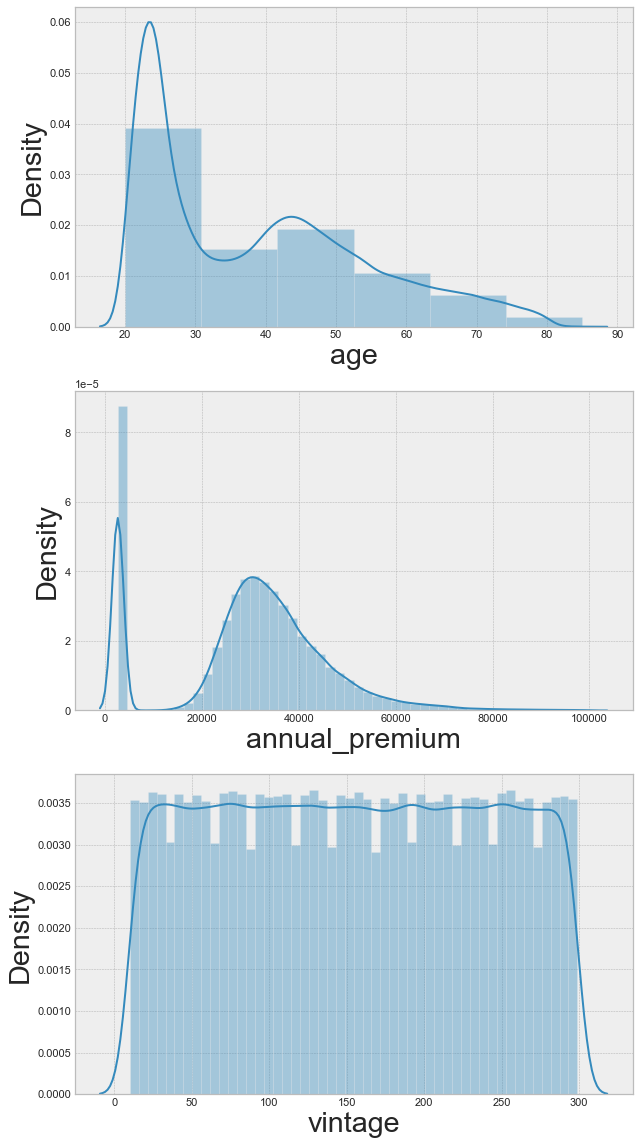

In [24]:
fig, axs = plt.subplots(3 ,figsize = (10,20))
sns.distplot(df1['age'], ax=axs[0], bins = 6);
sns.distplot(df1[df1['annual_premium'] < 100000]['annual_premium'], ax=axs[1]);
sns.distplot(df1['vintage'], ax=axs[2]);

/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

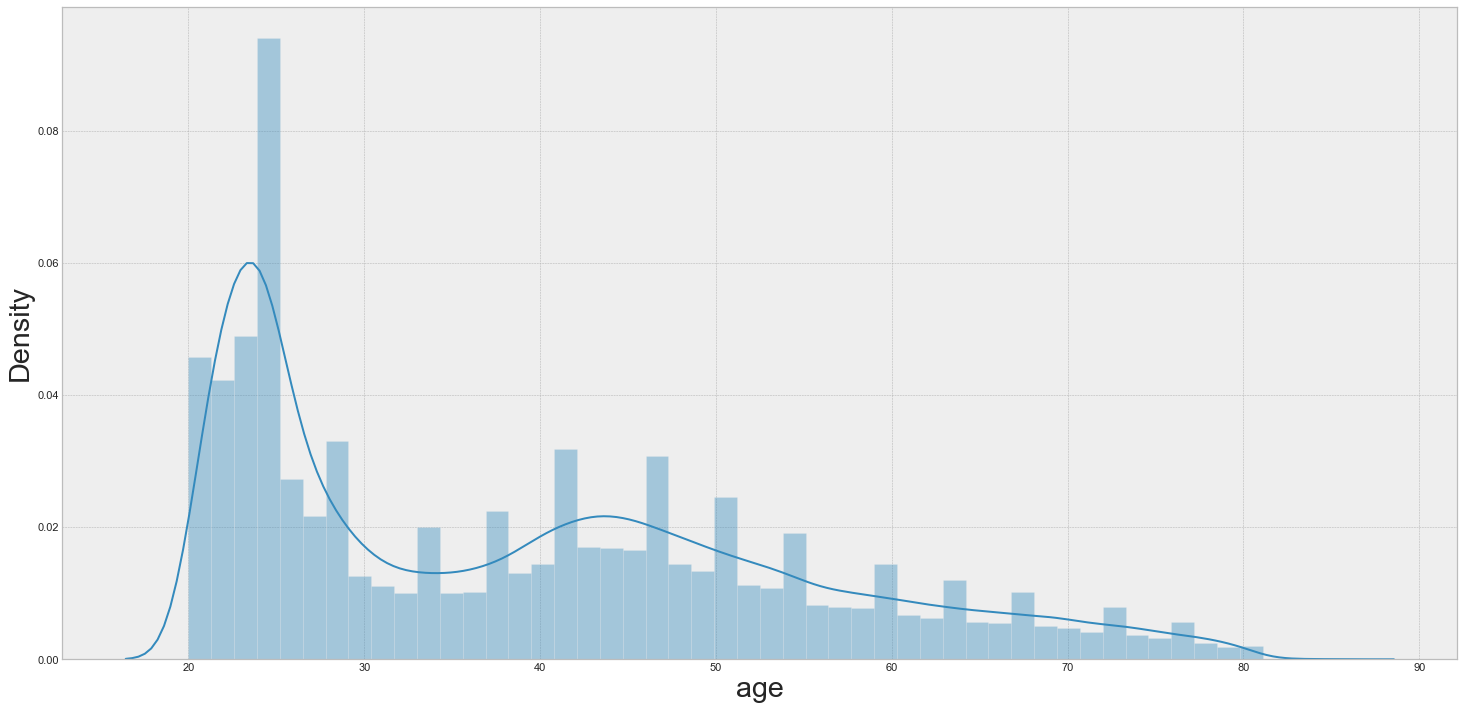

In [25]:
sns.distplot( df1["age"])

/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_premium', ylabel='Density'>

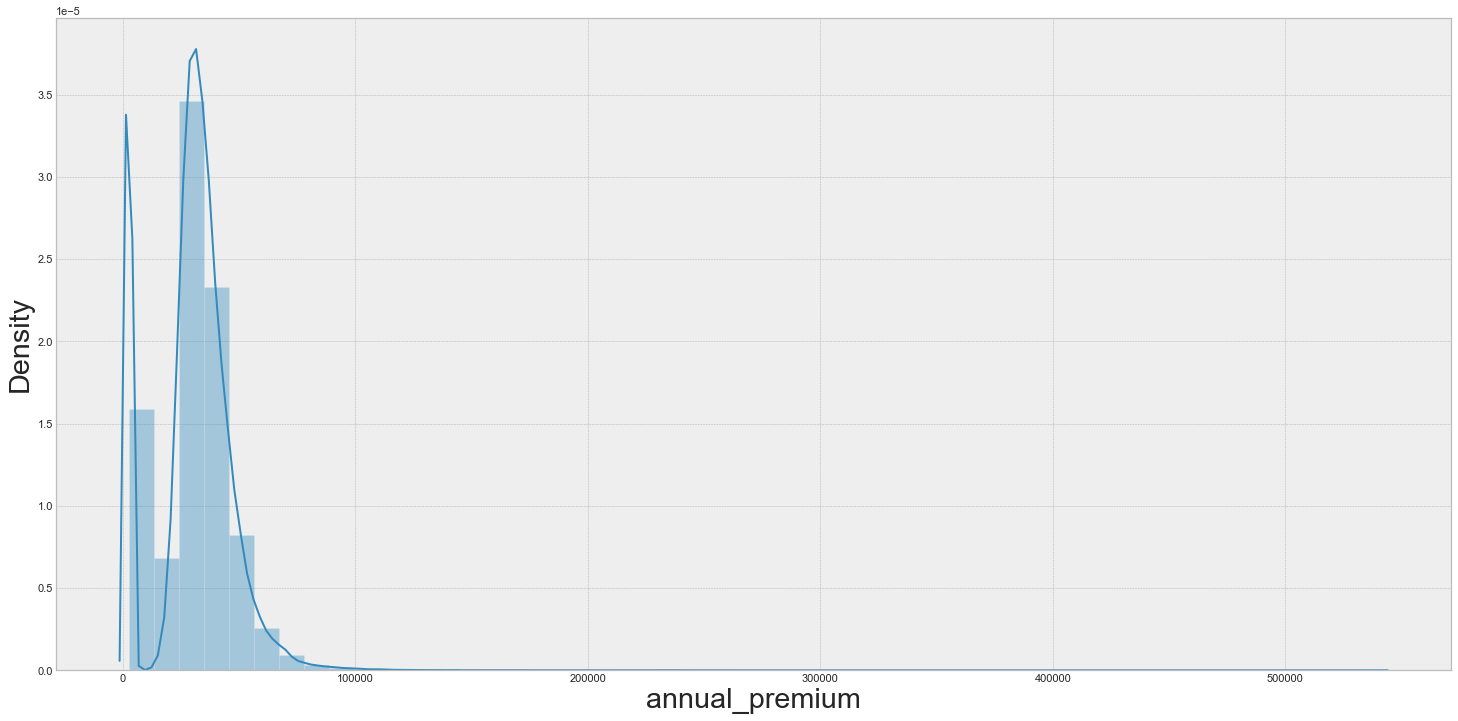

In [26]:
sns.distplot( df1["annual_premium"])


/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vintage', ylabel='Density'>

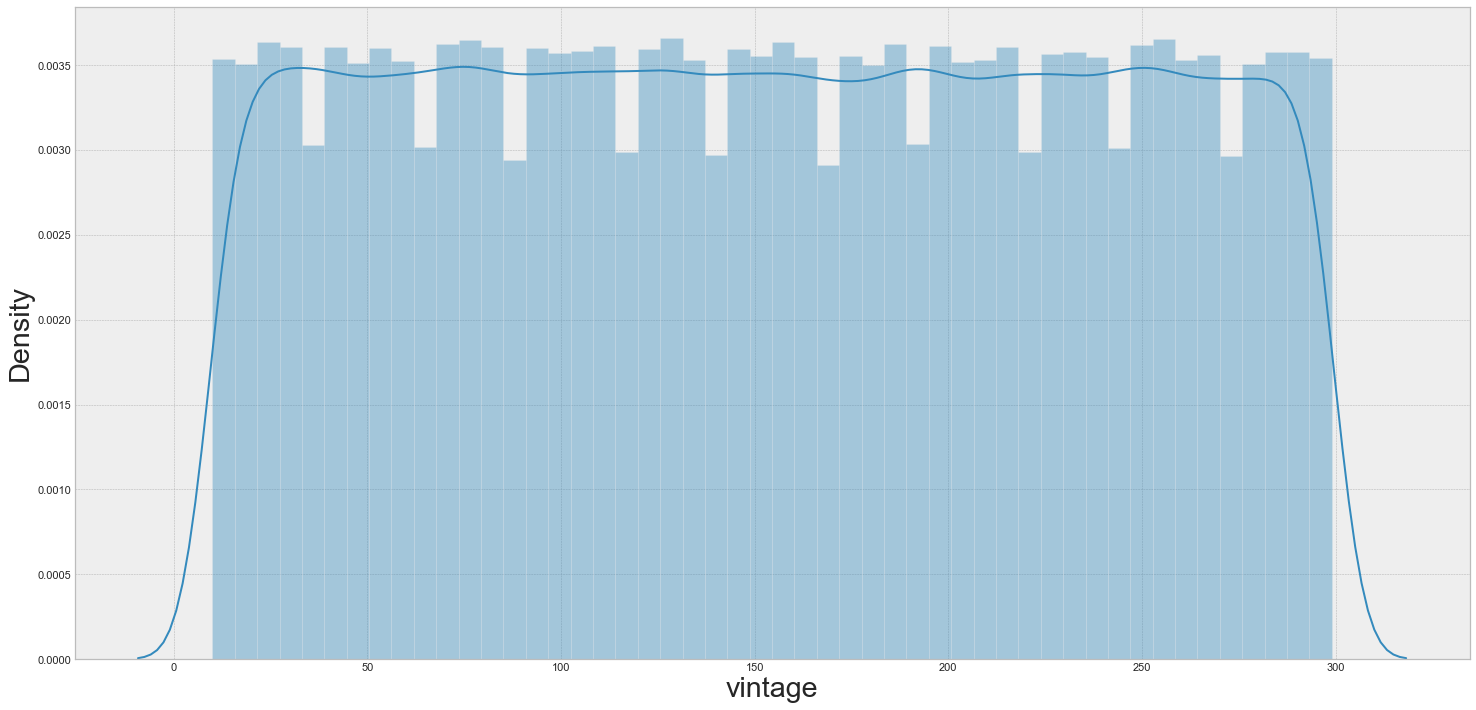

In [27]:
sns.distplot( df1["vintage"])

### 1.7.2 Categorical Attributes

/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

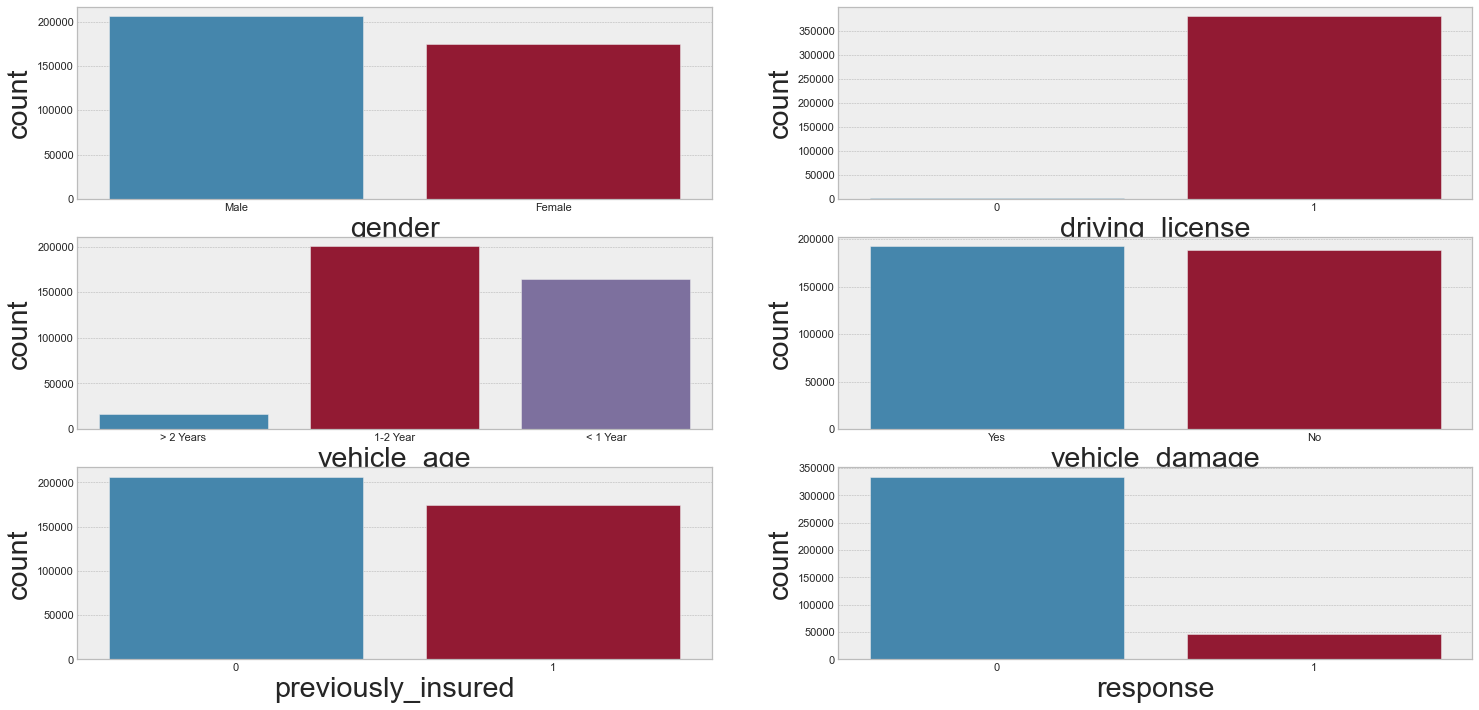

In [28]:
plt.subplot(3, 2, 1)
sns.countplot(df1['gender']);

plt.subplot(3, 2, 2)
sns.countplot(df1['driving_license']);

plt.subplot(3, 2, 3)
sns.countplot(df1['vehicle_age']);

plt.subplot(3, 2, 4)
sns.countplot(df1['vehicle_damage']);

plt.subplot(3, 2, 5)
sns.countplot(df1['previously_insured']);

plt.subplot(3, 2, 6)
sns.countplot(df1['response']);

# 2.0 Feature Engineering
#### (criar as variáveis, criar lista de hipóteses e validar as hipóteses)

## 2.1 Mapa Mental de Hipóteses

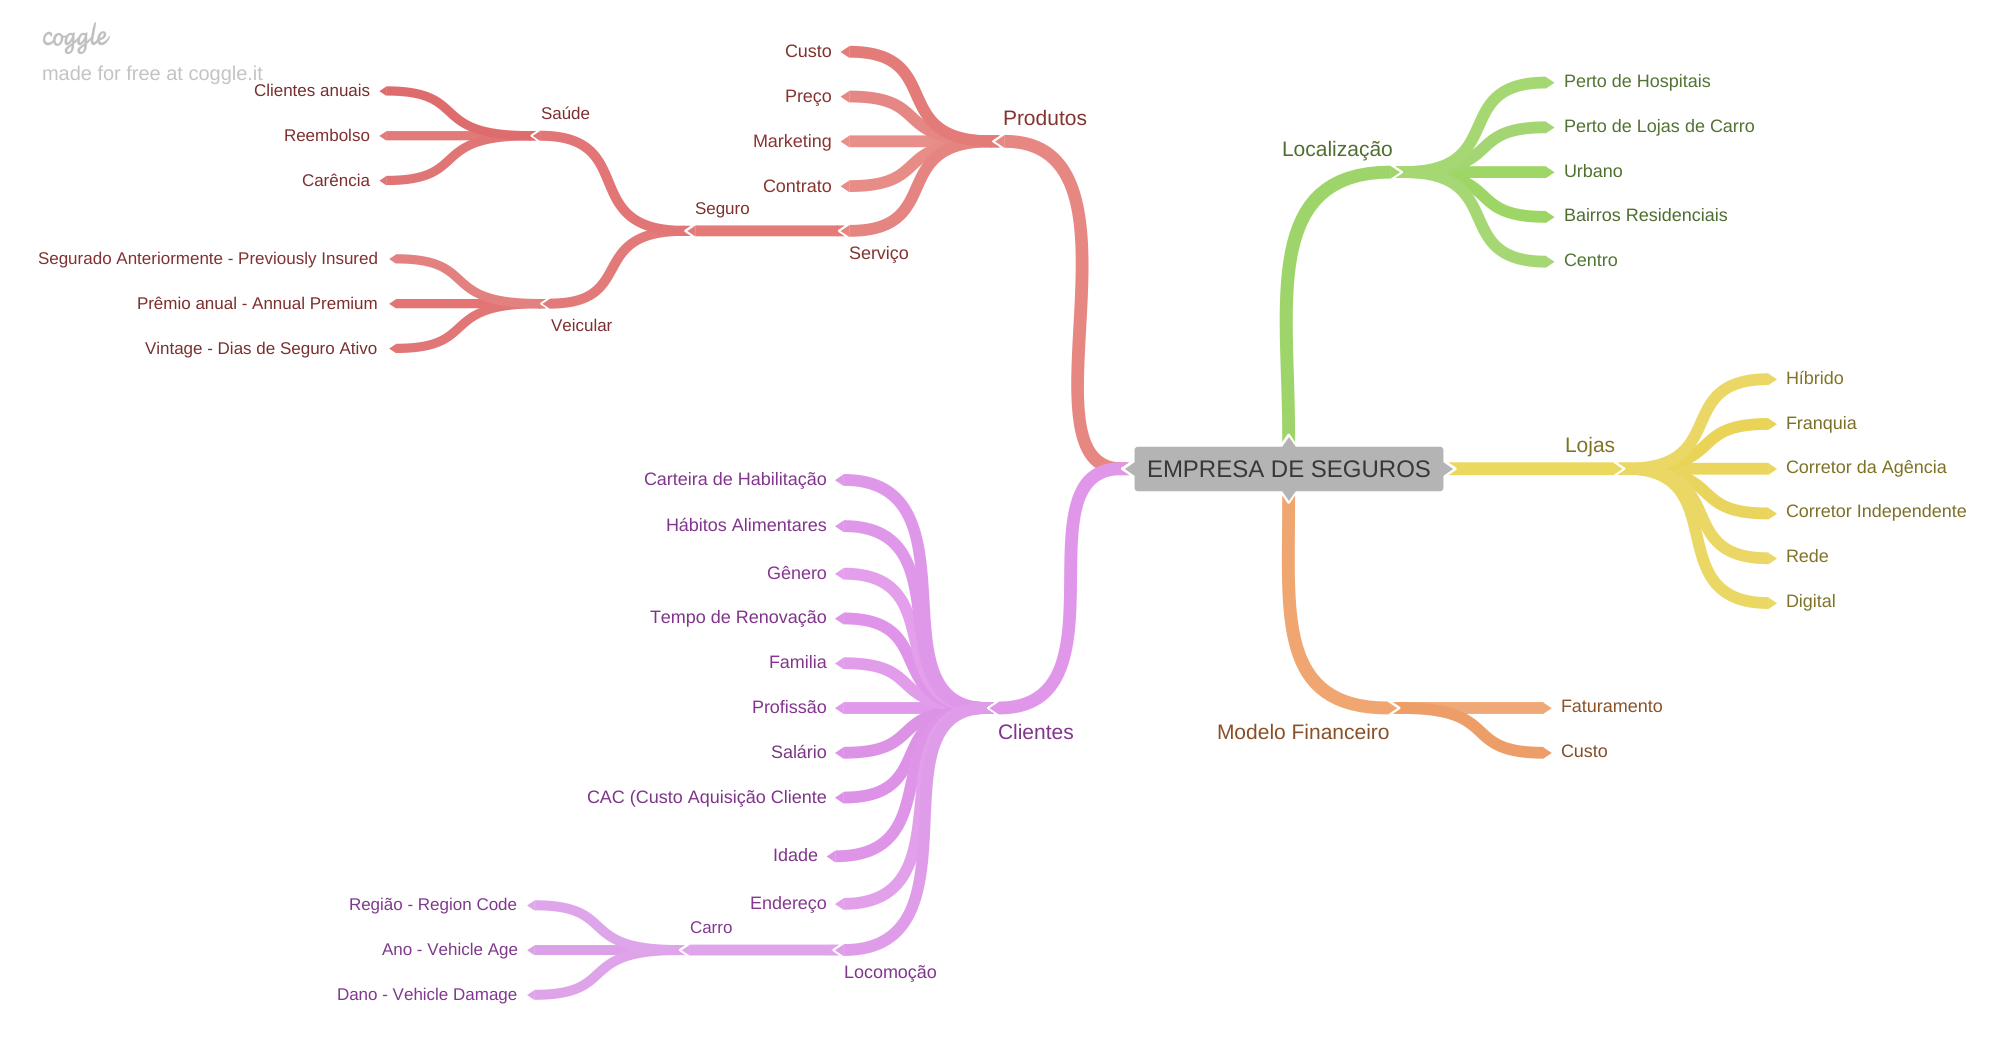

In [29]:
# mapa
Image("/Users/raquelrocha/documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/img/empresa_de_seguro.png")


In [30]:
df2 = df1.copy()

In [31]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


## 2.2 Criação das Hipóteses

### 2.2.1 Hipóteses Cliente

**1.** Mulheres usam menos o seguro veicular.

**2.** Homens causam mais acidentes de carro do que mulheres.

**3.** Clientes costumam renovar o seguro.

**4.** Grande parte dos clientes já possuem seguro veicular.

**5.** Pessoas mais velhas pagam mais caro no prêmio anual.

**6.** Jovens pagam mais caro no prêmio anual.

**7.** Donos de carros com mais de 2 anos fazem menos seguro veicular.

**8.** Jovens causam mais danos veicular do que idosos.

**9.** quem adiquire seguro veicular possue habilitação veicular.


### 2.2.2 Hipóteses Carro

**1.** Carros novos costumam ter seguro veicular.

**2.** Carros com mais de 2 anos não costuma ter seguro veicular.

**3.** Carro com mais de 2 anos já teve seguro.

**4.** Carro mais novo paga mais caro no premio anual.


### 2.2.3 Hipóteses Seguro

**1.** Quem já possui seguro veicular não tem interesse em adiquirir outro.

**2.** Quem não possui seguro veicular é mais sucetível a adiquirir seguro veicular.

**3.** Homens tem mais interesse em adquirir seguro veicular.

**4.** Mulheres tem menos interesse em adquirir seguro veicular.


### 2.3 Lista Final de Hipóteses

**1.** Clientes costumam renovar o seguro.

**2.** Grande parte dos clientes já possuem seguro veicular.

**3.** Donos de carros com mais de 2 anos fazem menos seguro veicular.

**4.** Quem adiquire seguro veicular possue habilitação veicular.

**5.** Carros com mais de 2 anos não costuma ter seguro veicular.

**6.** Carros novos costumam ter seguro veicular.

**7.** Quem já possui seguro veicular não tem interesse em adiquirir outro.

**8.** Quem não possui seguro veicular é mais sucetível a adiquirir seguro veicular.

**9.** Homens tem mais interesse em adquirir seguro veicular.

**10.** Mulheres tem menos interesse em adquirir seguro veicular.

### 2.4 Feature Engineering

In [32]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


In [33]:
#Organizando para ter apenas nomes categóricos e numéricos nas features

#vehicle age (tirar os símbolos)
df2["vehicle_age"] = df2["vehicle_age"].apply(lambda x: "over_2_years" if x == "> 2 Years" else "between_1_2_year" if x == "1-2 Year" else "below_1_year")

#vehicle damage (colocar em valores 0 e 1)
df2["vehicle_damage"] = df2["vehicle_damage"].apply(lambda x: 1 if x =="Yes" else 0)

#Mudando nome feature Response-x
df2 = df2.rename({'response_x': "response"}, axis = 1)


In [34]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,over_2_years,1,40454.0,26,217,1
1,2,Male,76,1,3,0,between_1_2_year,0,33536.0,26,183,0
2,3,Male,47,1,28,0,over_2_years,1,38294.0,26,27,1
3,4,Male,21,1,11,1,below_1_year,0,28619.0,152,203,0
4,5,Female,29,1,41,1,below_1_year,0,27496.0,152,39,0


# 3.0 Filtragem de Variáveis

In [35]:
df3 = df2.copy()

In [36]:
df3.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,over_2_years,1,40454.0,26,217,1
1,2,Male,76,1,3,0,between_1_2_year,0,33536.0,26,183,0
2,3,Male,47,1,28,0,over_2_years,1,38294.0,26,27,1
3,4,Male,21,1,11,1,below_1_year,0,28619.0,152,203,0
4,5,Female,29,1,41,1,below_1_year,0,27496.0,152,39,0


## 3.1 Filtragem das linhas

In [37]:
#diminuir volume dos dados que irá trabalhar
#não retiramos dados

## 3.2 Seleção das colunas

In [38]:
#Drop nas colunas que não precisamos
#Não retiramos dados

# 4.0 Análise Exploratória dos Dados - EDA 

In [39]:
df4=df3.copy()

In [40]:
df4.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,over_2_years,1,40454.0,26,217,1
1,2,Male,76,1,3,0,between_1_2_year,0,33536.0,26,183,0
2,3,Male,47,1,28,0,over_2_years,1,38294.0,26,27,1
3,4,Male,21,1,11,1,below_1_year,0,28619.0,152,203,0
4,5,Female,29,1,41,1,below_1_year,0,27496.0,152,39,0


## 4.1 Análise univariada

<AxesSubplot:xlabel='response', ylabel='age'>

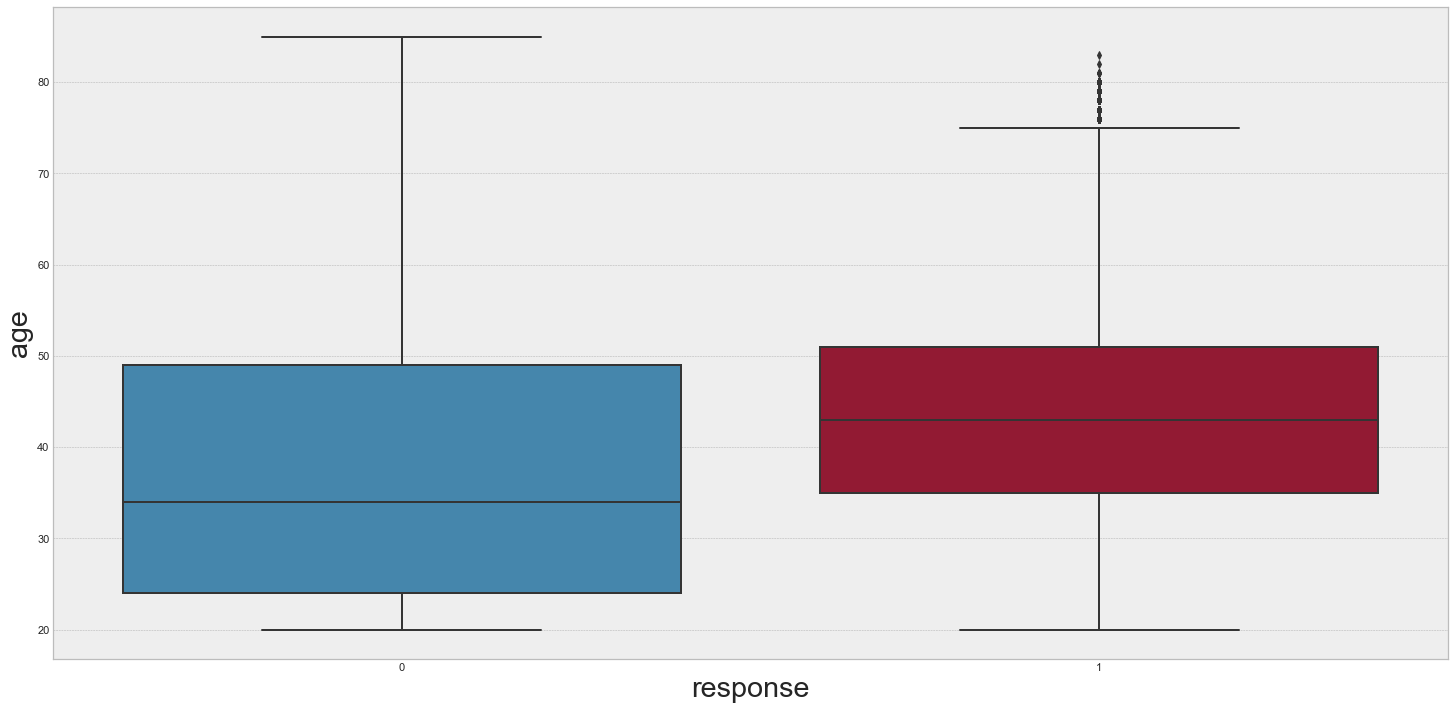

In [41]:
#age
sns.boxplot(x="response", y="age", data=df4)

<AxesSubplot:xlabel='age', ylabel='Count'>

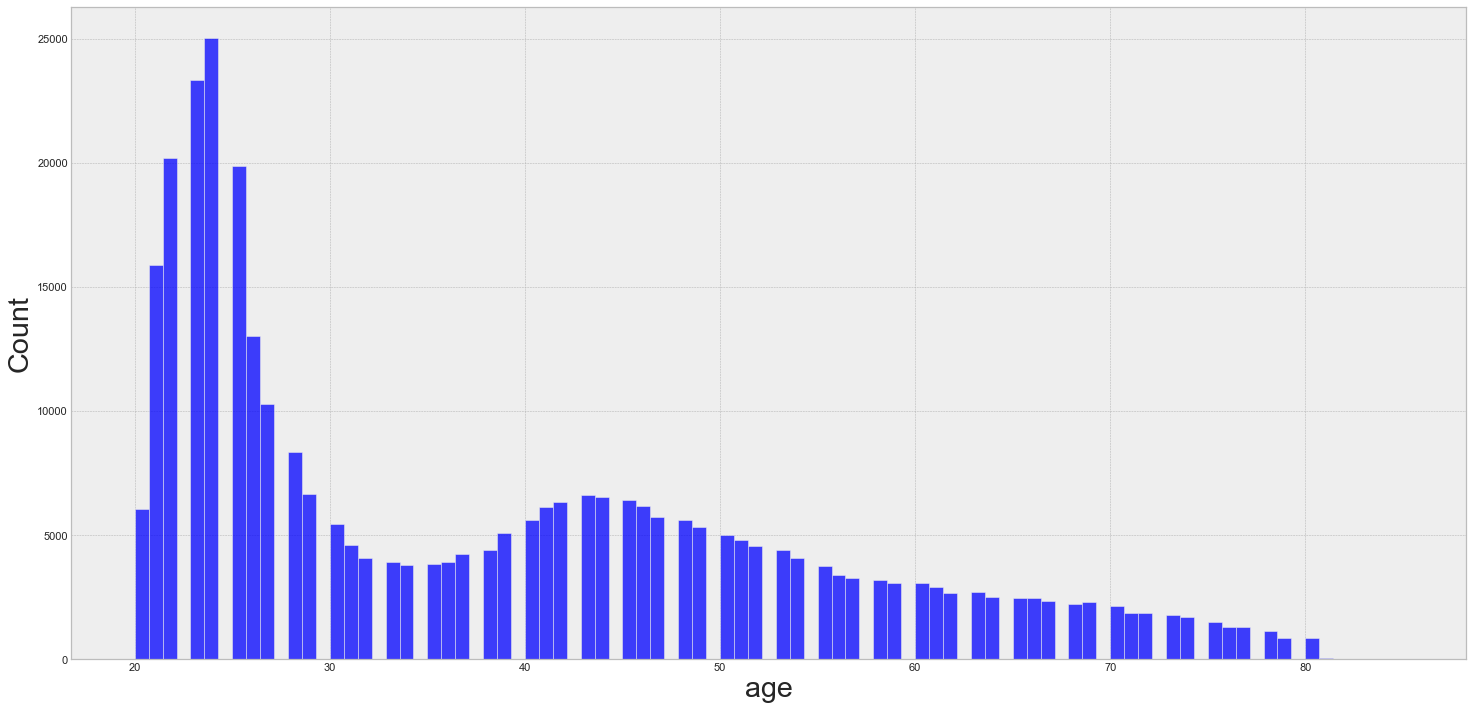

In [42]:
#ver a distribuição do grupo "0" do response, que não tem interesse
#gráfico mais para uma poisson do que uma normal
aux1 = df4.loc[df4["response"]==0, "age"]
sns.histplot(aux1)


<AxesSubplot:xlabel='age', ylabel='Count'>

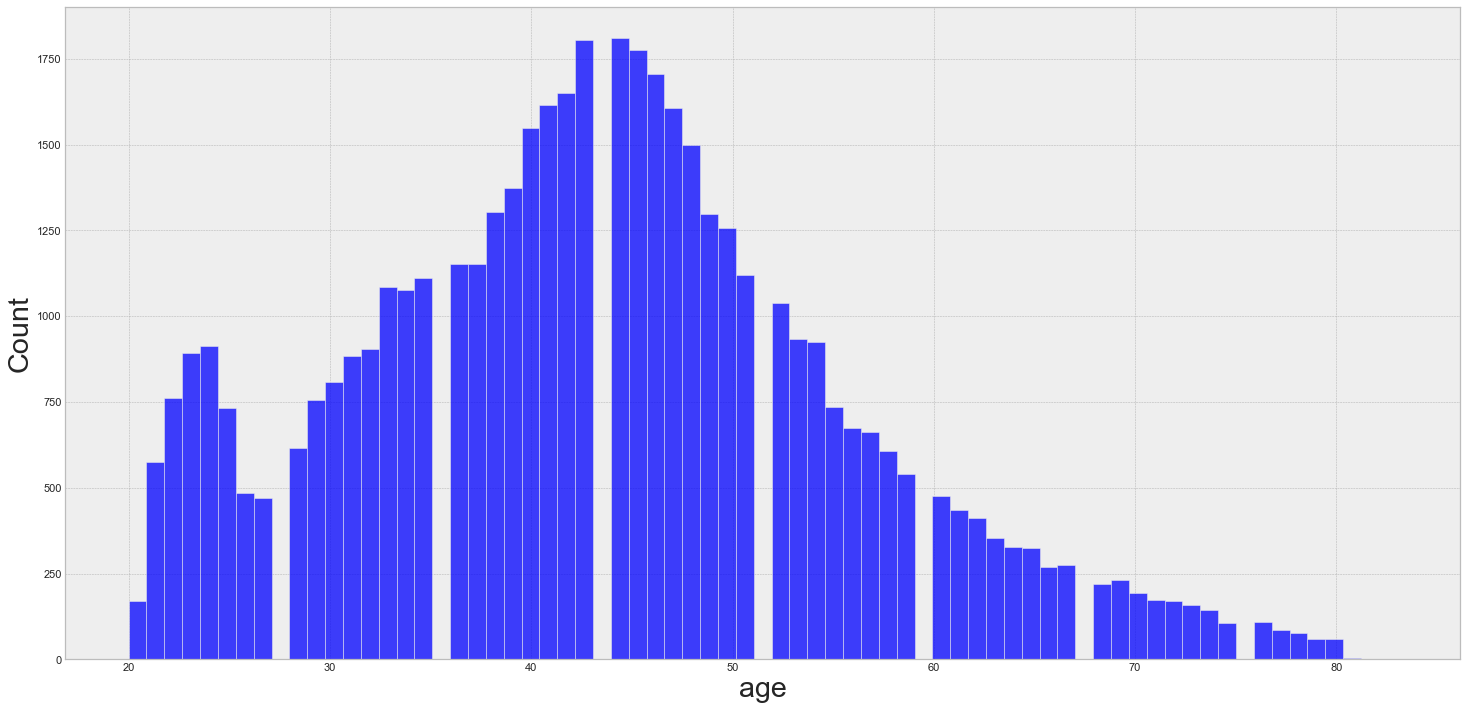

In [43]:
#ver a distribuição do grupo "1" do response, que tem interesse
#gráfico mais para uma normal
aux1 = df4.loc[df4["response"]==1, "age"]
sns.histplot(aux1)


<AxesSubplot:xlabel='response', ylabel='annual_premium'>

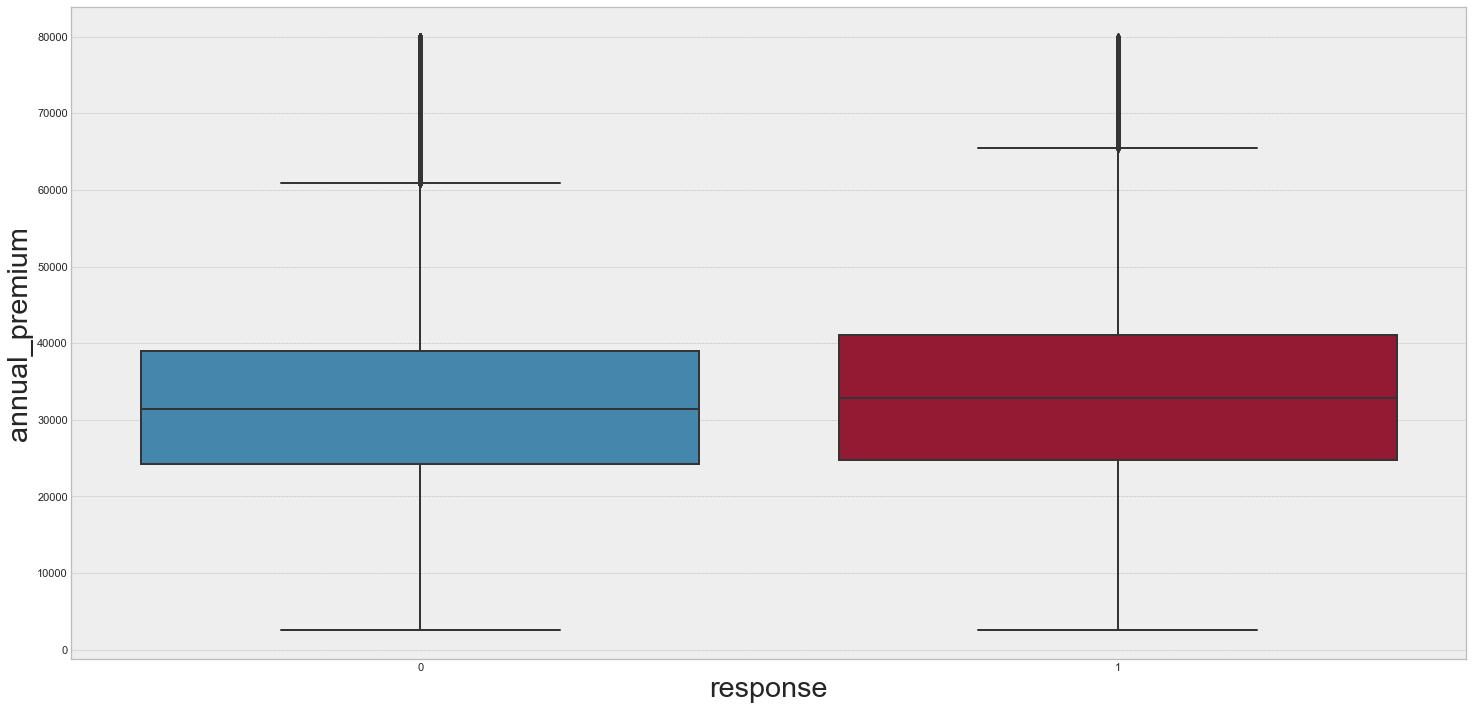

In [44]:
#annual_premium
#gráfico ruim, muito outlier
#sns.boxplot(x="response", y="annual_premium", data=df4)

#filtro dos quartis para entender melhor, colocamos um numero menor para analisar 80.000 do dataset
#por enquanto vimos que ela sozinha não cria grupo suficiente para trabalhar(separado, como tem que ser em uma classificação)
aux = df4[df4["annual_premium"] < 80000]
sns.boxplot(x="response", y="annual_premium", data=aux)


<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

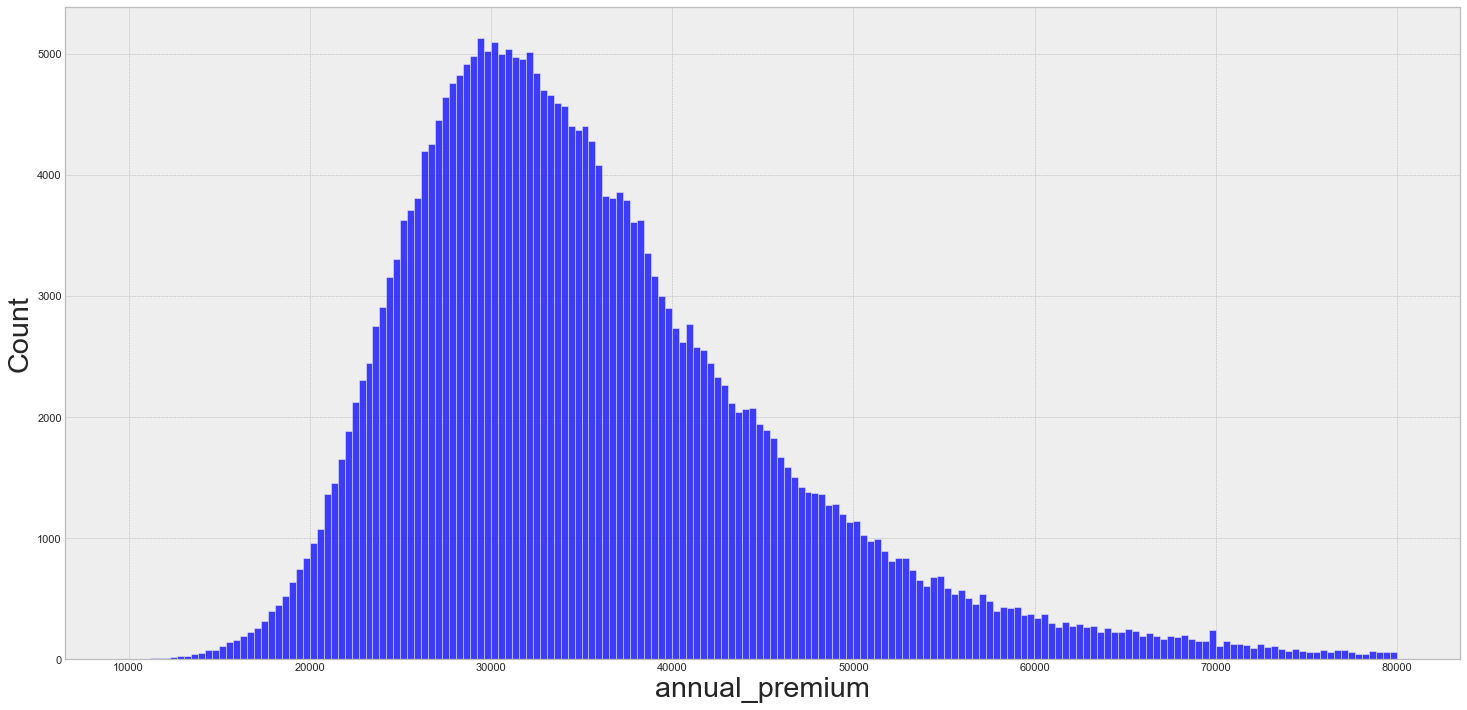

In [45]:
aux = df4[(df4["annual_premium"] > 10000) & (df4["annual_premium"] < 80000)]

#filtrar do aux (acima) para diminuir o numero do dataset
aux11 = aux.loc[aux["response"]==0, "annual_premium"]
sns.histplot(aux11)


<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

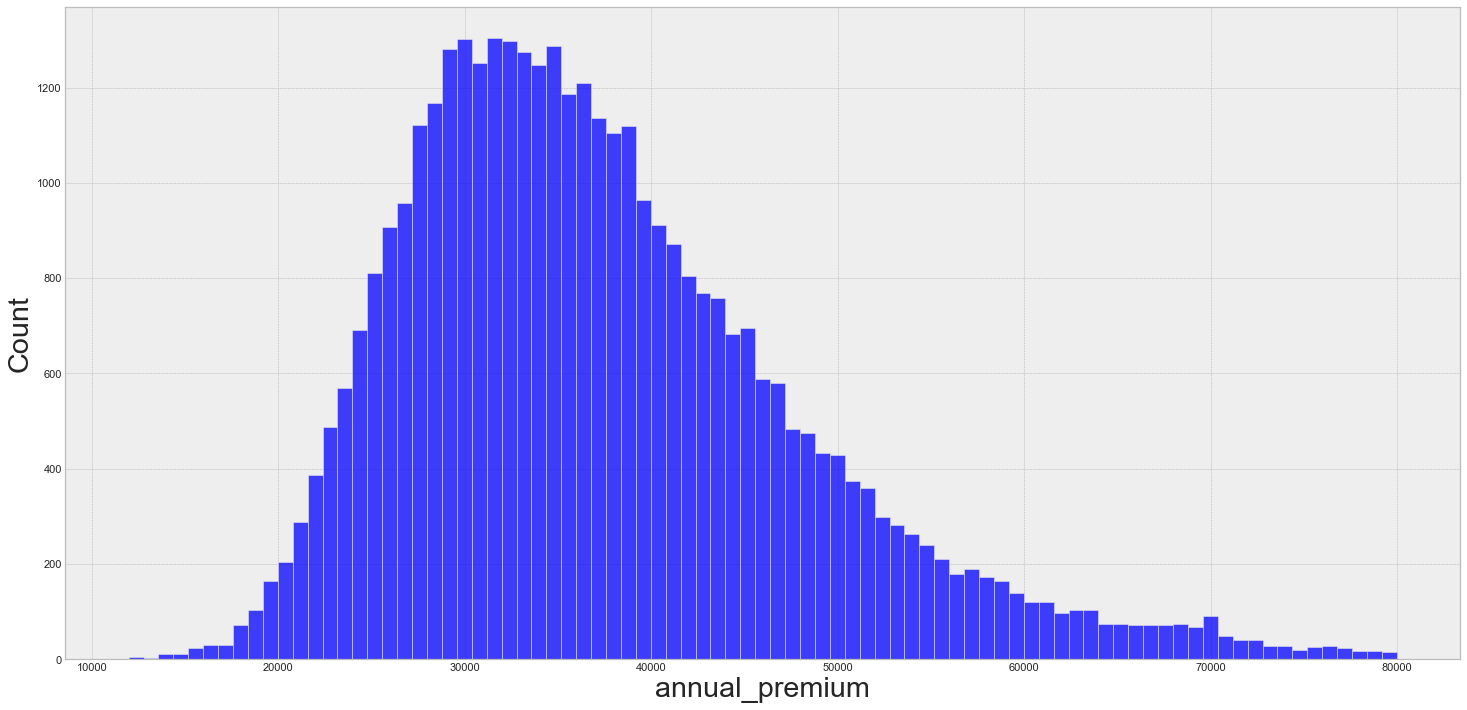

In [46]:
aux11 = aux.loc[df4["response"]==1, "annual_premium"]
sns.histplot(aux11)


In [47]:
#driving_license
df4[["driving_license", "response"]].head()

,driving_license,response
0,1,1
1,1,0
2,1,1
3,1,0
4,1,0


<AxesSubplot:xlabel='response', ylabel='driving_license'>

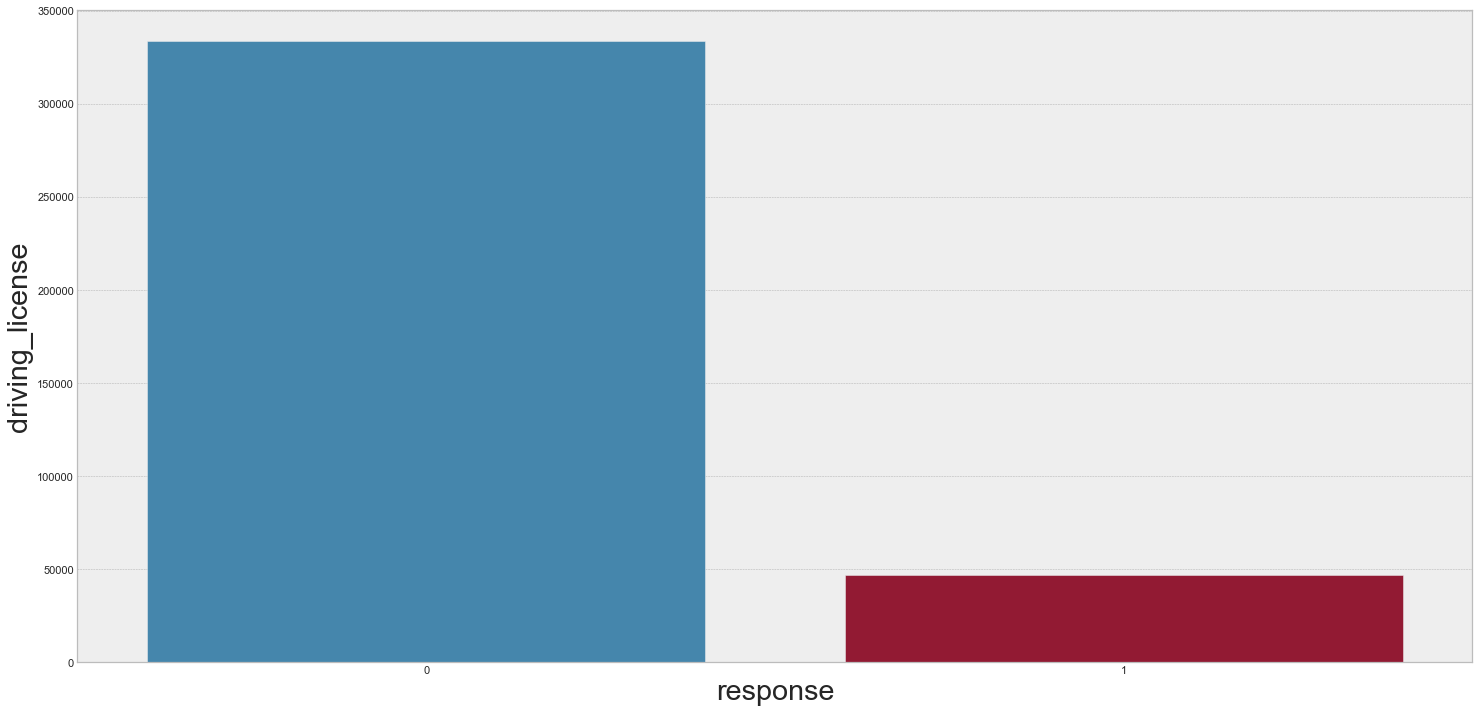

In [48]:
#aqui somaremos agregado (com outra feature)
aux2 = df4[["driving_license", "response"]].groupby("response").sum().reset_index()
sns.barplot(x="response", y="driving_license", data=aux2)
#plt.legend() para colocar legenda, tem que descrever a legenda


In [49]:
#aqui somaremos agregado (com outra feature)
aux2 = df4[["driving_license", "response"]].groupby("response").sum().reset_index()
aux2.head()


,response,driving_license
0,0,333628
1,1,46669


In [50]:
#aqui veremos a porcentagem
#podemos ver que 87% que dirigem não quer fazer seguro e 12% quer fazer, mas tem que analisar melhor.
aux2 = df4[["driving_license", "response"]].groupby("response").sum().reset_index()
aux2.head
aux2["driving_license_perc"] = aux2["driving_license"]/ aux2["driving_license"].sum()


In [51]:
aux2

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


<AxesSubplot:xlabel='region_code', ylabel='id'>

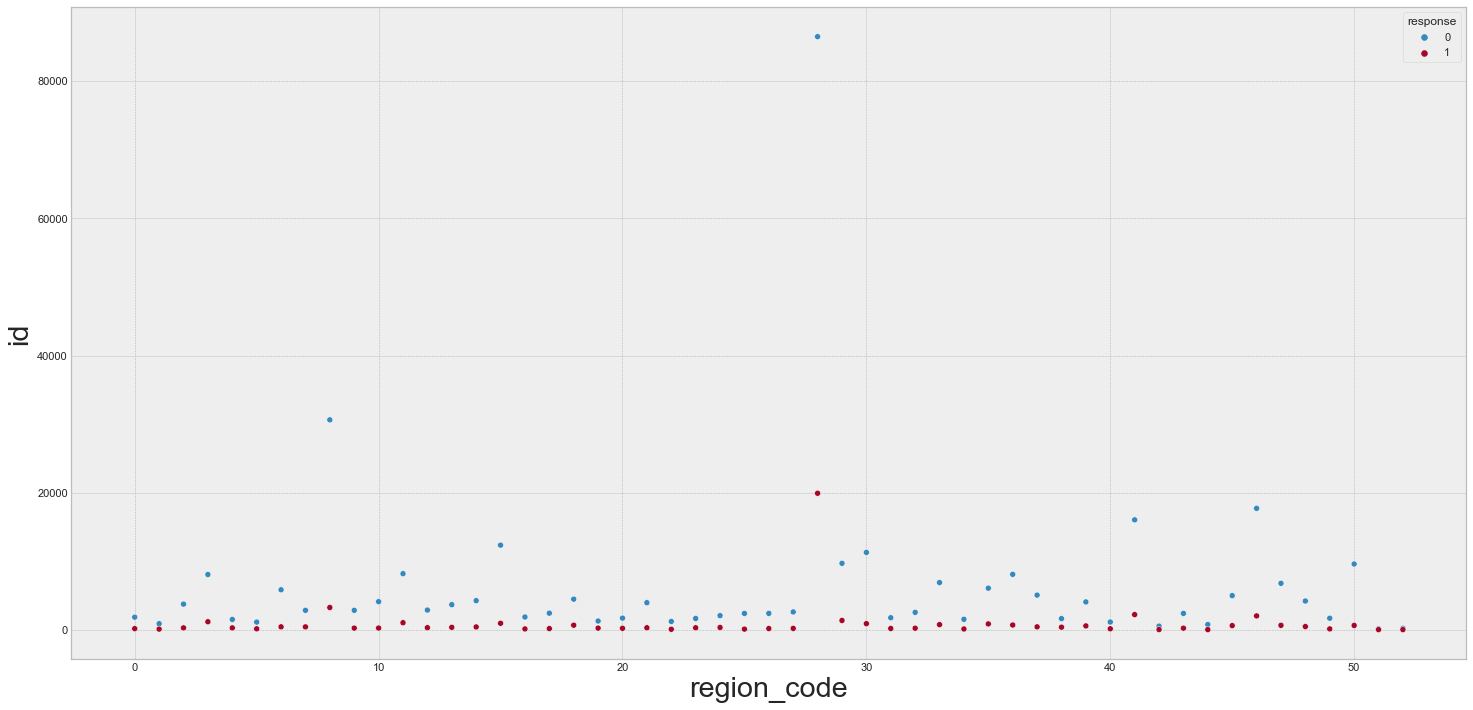

In [52]:
#region_code
#usaremos o scaterplot, pois nele podemos ver se existem grupos que se destacam
aux3 = df4[["id", "region_code", "response"]].groupby(["region_code", "response"]).count().reset_index()
# hue são as cores que estarão em cima da feature response, data é de onde veio, que seria da variável aux3
#a pesar de alguns outliers separando alguns clusters, a maioria esta bastante junto, então pode não ser uma boa variável.
sns.scatterplot(x="region_code", y="id", hue="response", data=aux3)

#P.S. normalmente region code, sendo estados podemos passar o lat e long para entender outras características. 


In [53]:
#previously_insured
df4[["previously_insured", "response"]].head()


,previously_insured,response
0,0,1
1,0,0
2,0,1
3,1,0
4,1,0


In [54]:
#crosstab, faz a tabela de contingência
#essa tabela explica: quantas pessoas não tiveram anteriormente seguro e não quer o novo produto, e quem não tem o seguro e quer o novo produto 
pd.crosstab(df4["previously_insured"], df4["response"])

#P.s. aqui pode ser uma feature que acabe vazando dados e prejudique na etapa do ML


response,0,1
previously_insured,,
0,159929,46552
1,174470,158


In [55]:
#aqui mostra a tabela de contingência em porcentagem
pd.crosstab(df4["previously_insured"], df4["response"]).apply(lambda x: x/x.sum(), axis=1)
            

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [56]:
#vehicle_age
#value_counts, nesse caso dará o mesmo resultado que o groupby
df4[["vehicle_age", "response"]].value_counts().reset_index()


,vehicle_age,response,0
0,between_1_2_year,0,165510
1,below_1_year,0,157584
2,between_1_2_year,1,34806
3,over_2_years,0,11305
4,below_1_year,1,7202
5,over_2_years,1,4702


In [57]:
#ver em porcentagem
df4[["vehicle_age", "response"]].value_counts(normalize=True).reset_index()


,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


response,0,1
vehicle_damage,,
0,0.994796,0.005204
1,0.762345,0.237655


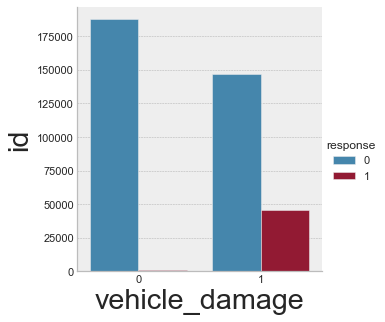

In [205]:
#vehicle_damage
aux6 = df4[['id', 'vehicle_damage', 'response']].groupby( ['vehicle_damage', 'response'] ).count().reset_index()
sns.catplot( x='vehicle_damage', y='id', hue='response', kind='bar', data=aux6);

pd.crosstab(df4['vehicle_damage'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1 )


<AxesSubplot:xlabel='response', ylabel='policy_sales_channel'>

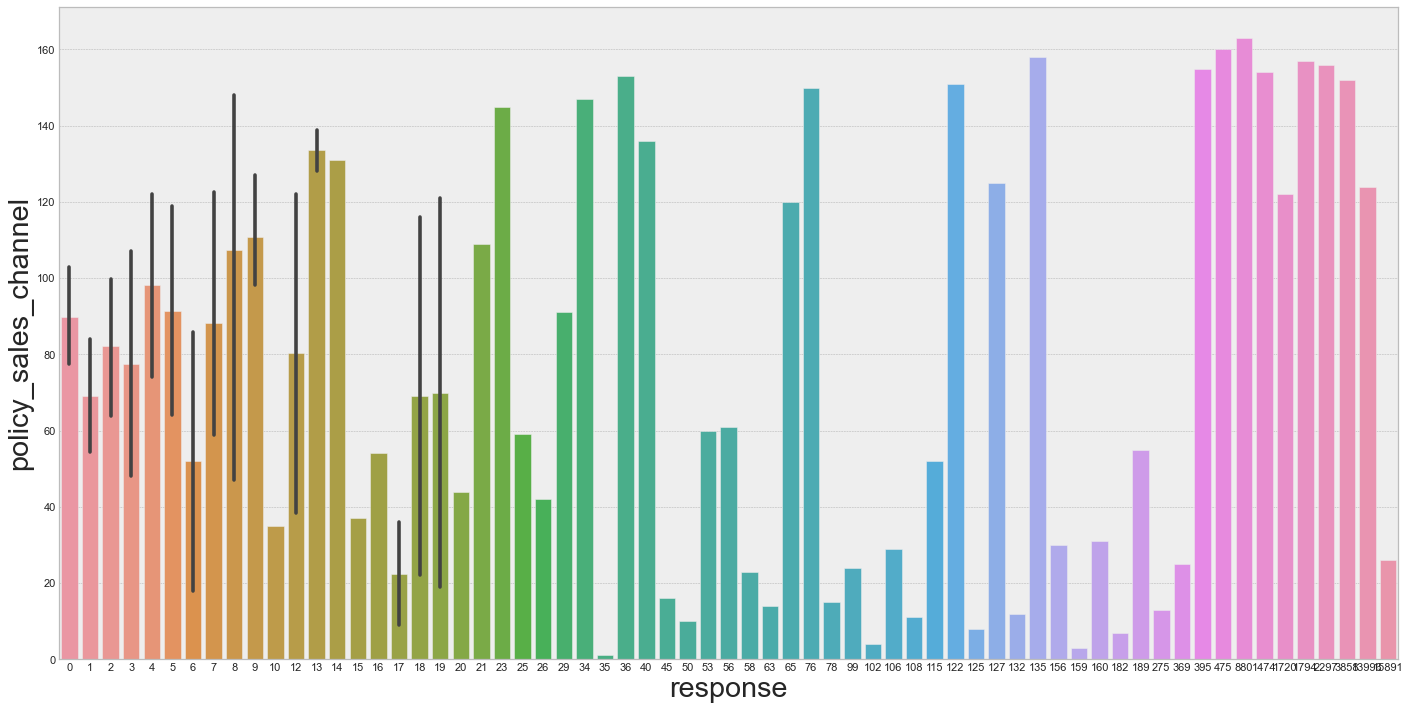

In [59]:
#policy_sales_channel
plt.figure(figsize=(24,12))
aux4 = df4 [["policy_sales_channel", "response"]].groupby("policy_sales_channel").sum().reset_index()
#aqui trocamos a posição para ficar melhor de ver no gráfico
sns.barplot( x="response", y="policy_sales_channel", data=aux4)


In [60]:
# Gráfico de barra empilhada


<AxesSubplot:xlabel='response', ylabel='vintage'>

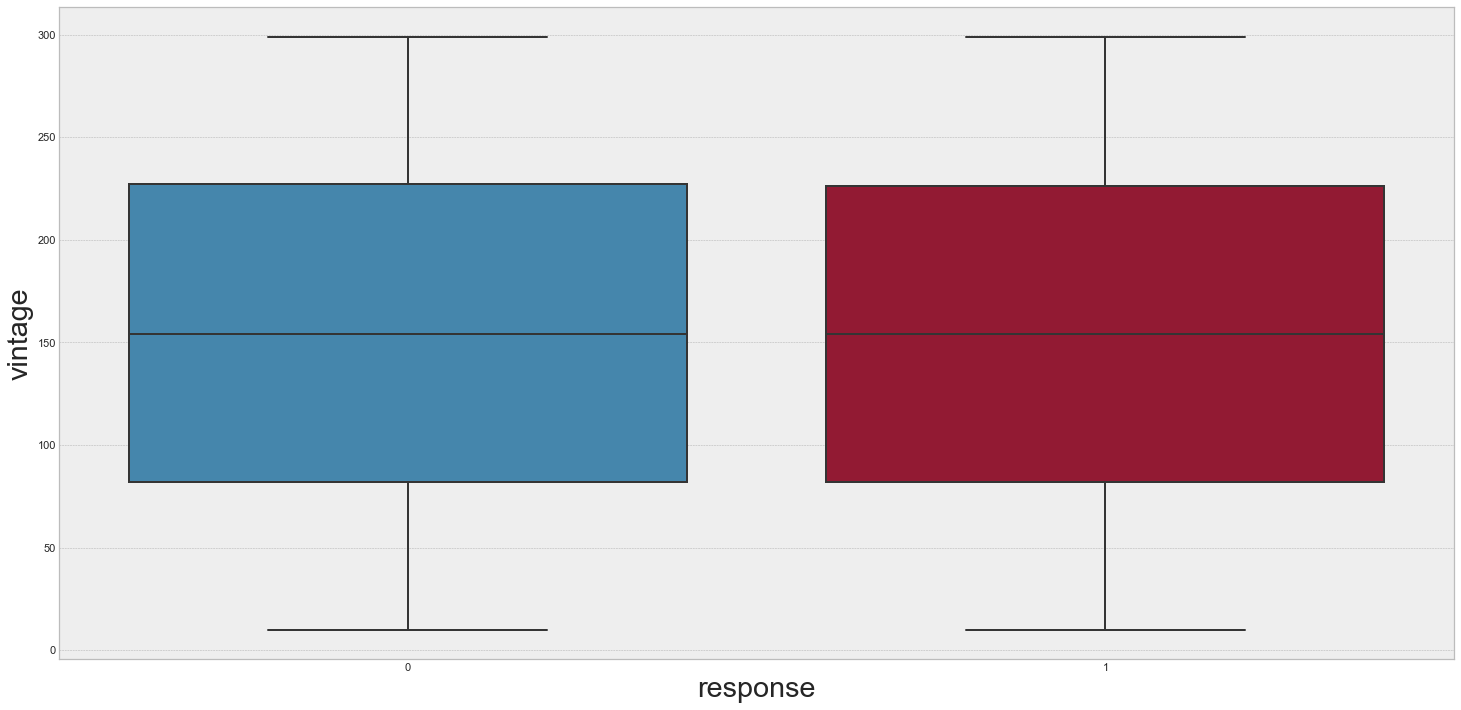

In [61]:
#vintage
sns.boxplot( x="response", y="vintage", data=df4)


<AxesSubplot:xlabel='vintage', ylabel='Count'>

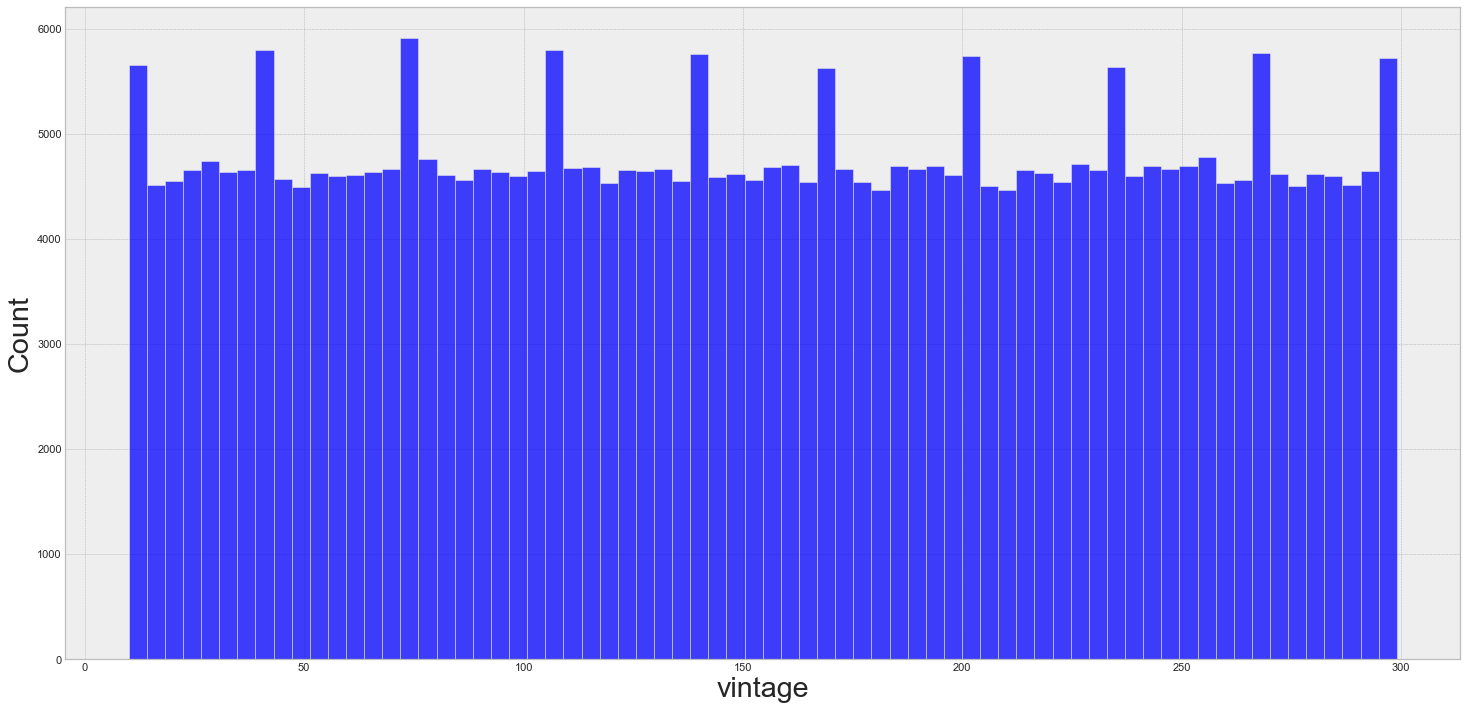

In [62]:
aux5 = df4.loc[df4["response"]==0, "vintage"]
sns.histplot(aux5)


<AxesSubplot:xlabel='vintage', ylabel='Count'>

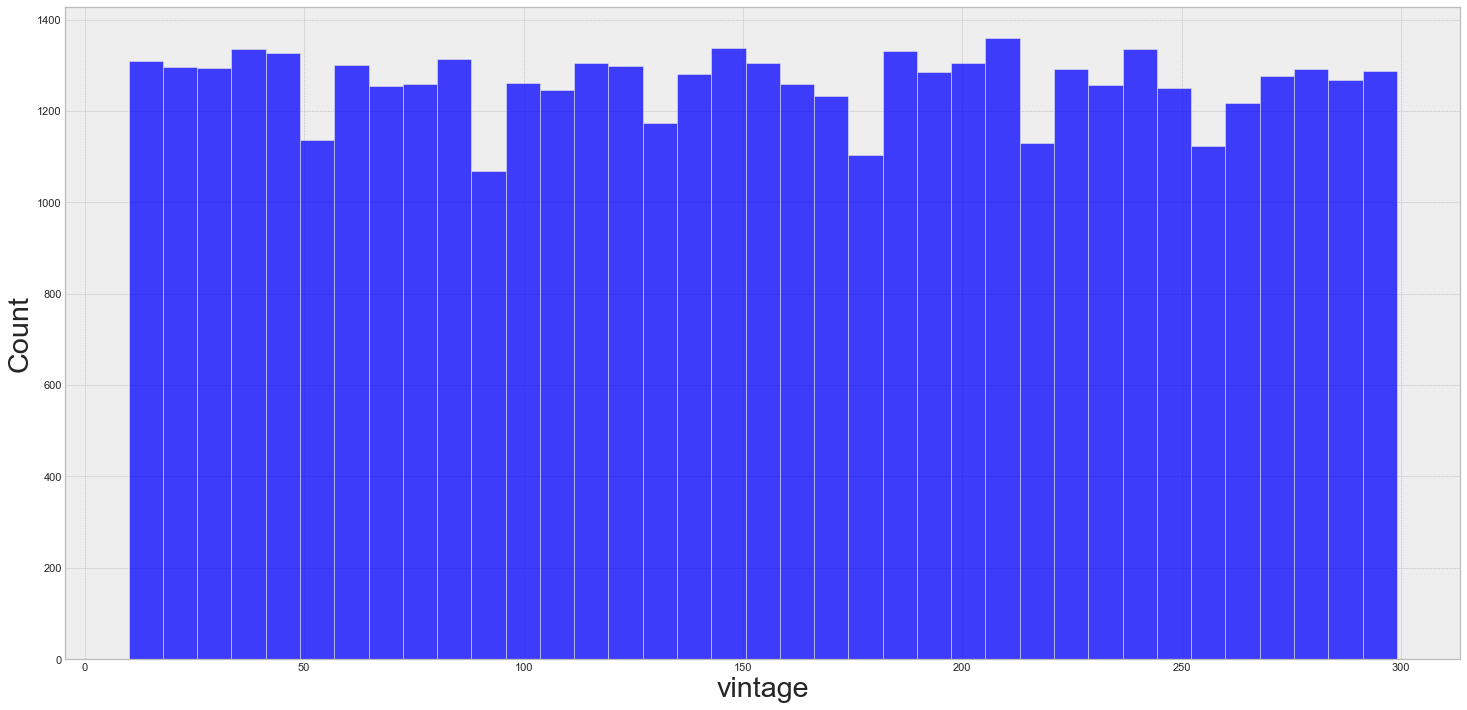

In [63]:
aux5 = df4.loc[df4["response"]==1, "vintage"]
sns.histplot(aux5)


<AxesSubplot:xlabel='response', ylabel='age'>

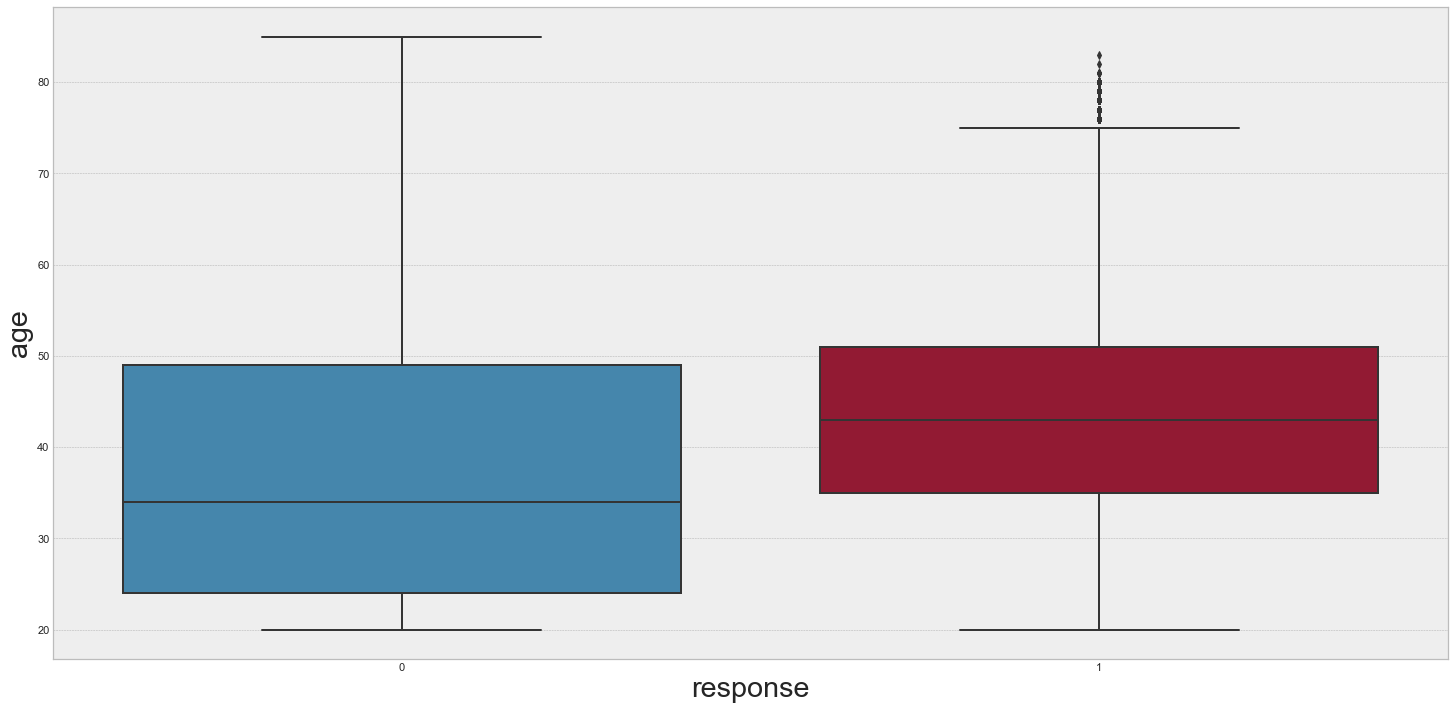

In [64]:
#gender (ver depois e fazer com gráfico de pizza)
sns.boxplot(x="response", y="age", data=df4)

### 4.1.1 Response variable


In [65]:
#porcentagem acima do gráfico de barras
def graphic_percentage(ax,total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}'.format(height/total*100),
                ha="center")
    return

In [66]:
#distribuição das variáveis
#gráfico ruim para essa variável
# sns.displot(df4["response"])

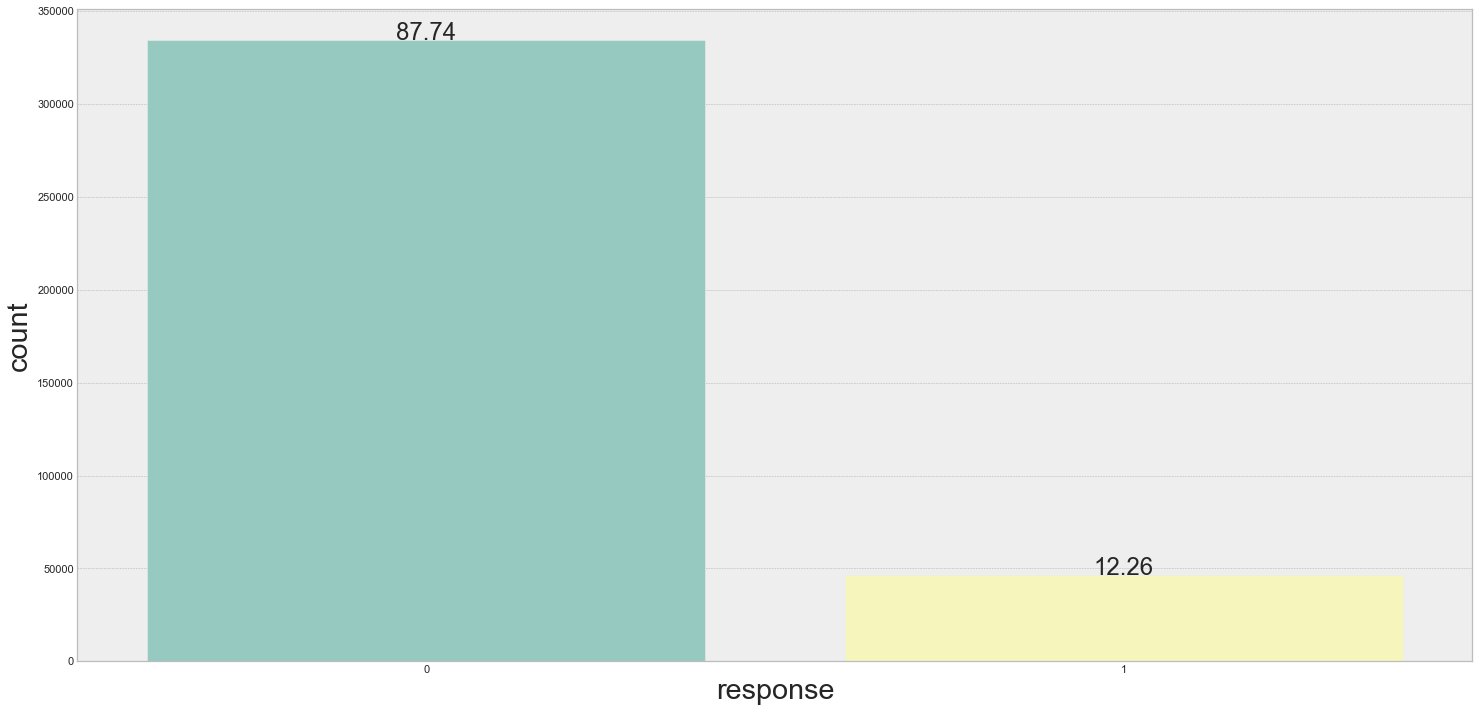

In [67]:
#distribuicão das variáveis
ax = sns.countplot(x="response", data=df4, palette="Set3")
total =len(df4["response"])
graphic_percentage(ax,total)

### 4.1.2 Numerical variable

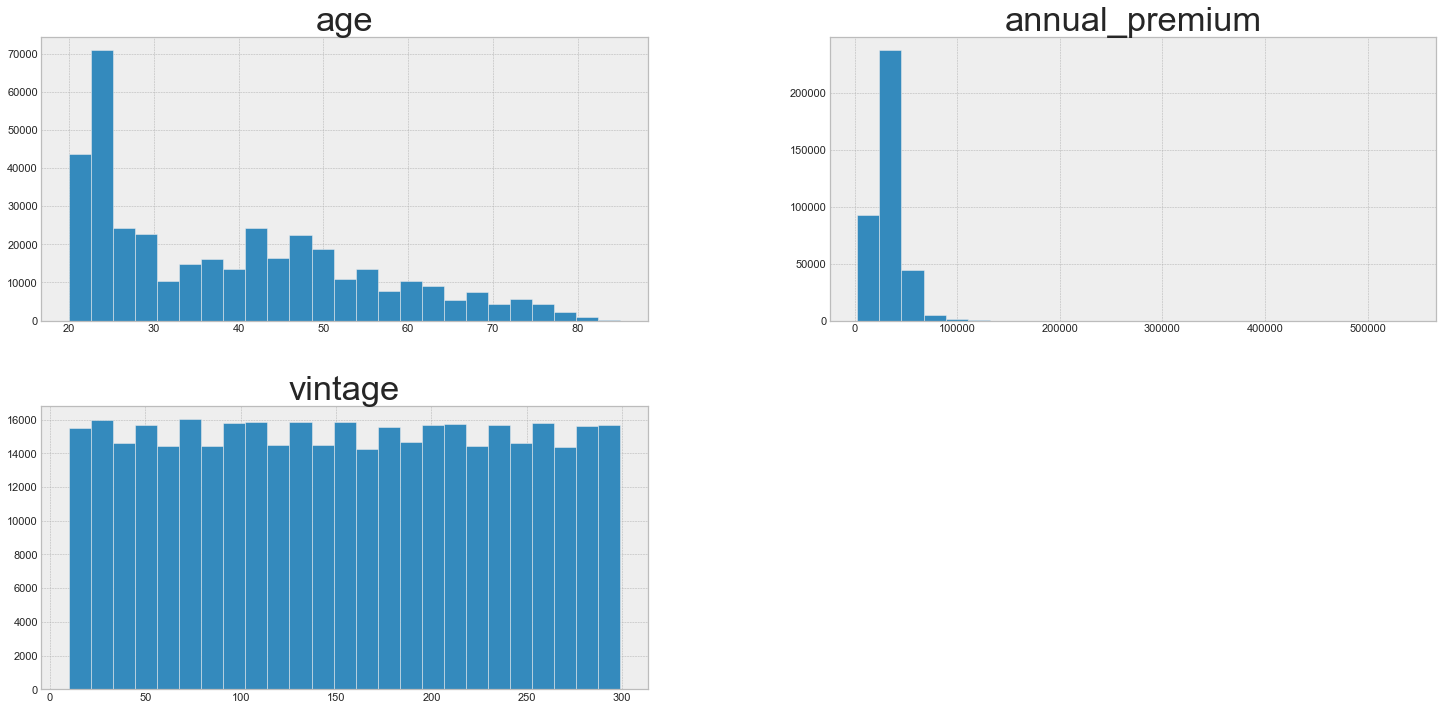

In [68]:
num_attributes.hist(bins=25);

### 4.1.3 Categorical variable

In [69]:
cat_attributes.head()

,gender,driving_license,previously_insured,vehicle_age,vehicle_damage,response
0,Male,1,0,> 2 Years,Yes,1
1,Male,1,0,1-2 Year,No,0
2,Male,1,0,> 2 Years,Yes,1
3,Male,1,1,< 1 Year,No,0
4,Female,1,1,< 1 Year,No,0


In [70]:
#df4["gender"].drop_duplicates()

In [71]:
#df4["vehicle_age"].drop_duplicates()

In [72]:
#df4["vehicle_damage"].drop_duplicates()

In [73]:
df4.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,over_2_years,1,40454.0,26,217,1
1,2,Male,76,1,3,0,between_1_2_year,0,33536.0,26,183,0
2,3,Male,47,1,28,0,over_2_years,1,38294.0,26,27,1
3,4,Male,21,1,11,1,below_1_year,0,28619.0,152,203,0
4,5,Female,29,1,41,1,below_1_year,0,27496.0,152,39,0


/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

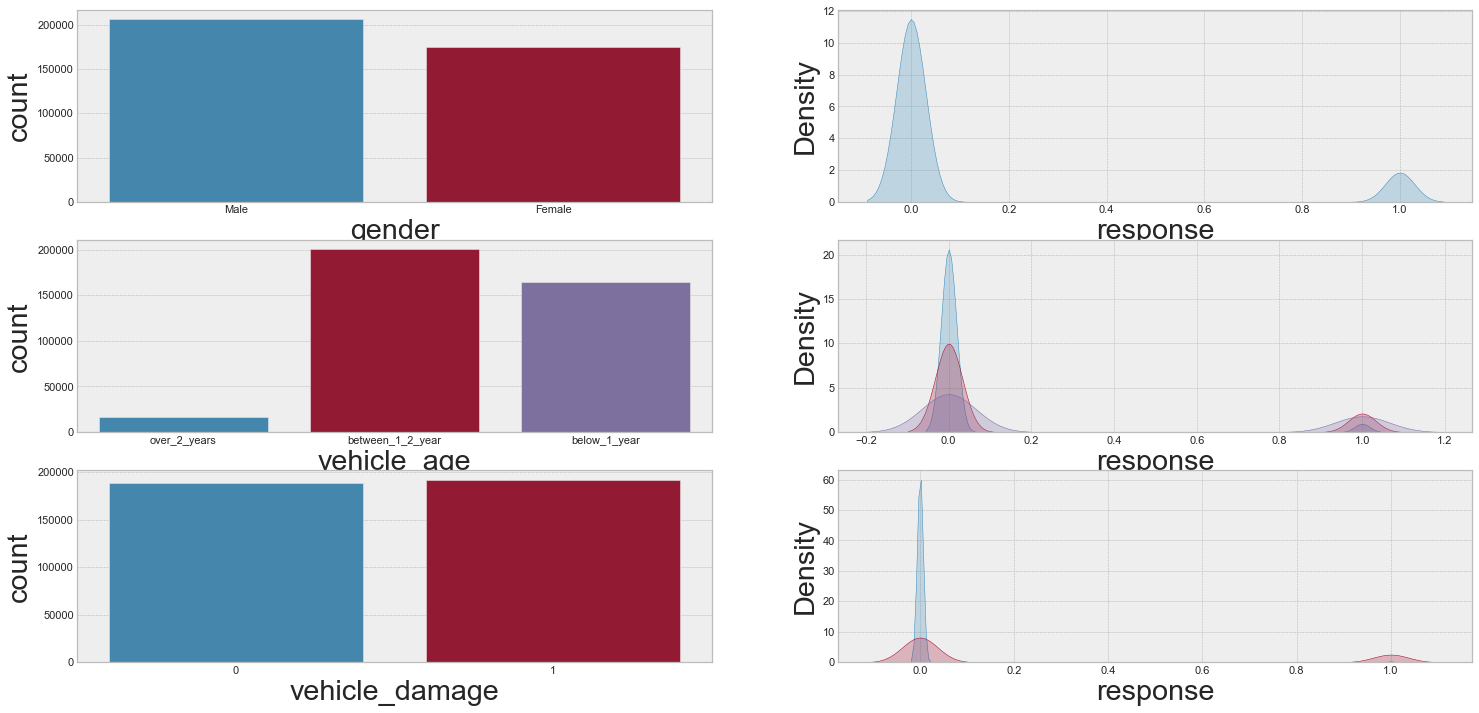

In [74]:
# seleciona apenas as variáveis categóricas para olhar os gráficos comparativos

# ver somente "gender" na variável response (shade deixa o gráfico mais transparente para sobrepor dois gráficos e ver melhor as comparações)
plt.subplot(3,2,1)
sns.countplot(df4["gender"]);

plt.subplot(3,2,2)
sns.kdeplot (df4[df4["gender"] == "Male" ]["response"], label="Male", shade=True);
sns.kdeplot (df4[df4["gender"] == "female" ]["response"], label="Male", shade=True);

# ver somente "vehicle_age" na variável response (shade deixa o gráfico mais transparente para sobrepor dois gráficos e ver melhor as comparações)
plt.subplot(3,2,3)
sns.countplot(df4["vehicle_age"]);

plt.subplot(3,2,4)
sns.kdeplot (df4[df4["vehicle_age"] == "below_1_year" ]["response"], label="below_1_year", shade=True);
sns.kdeplot (df4[df4["vehicle_age"] == "between_1_2_year" ]["response"], label="between_1_2_year", shade=True);
sns.kdeplot (df4[df4["vehicle_age"] == "over_2_years" ]["response"], label="over_2_years", shade=True);

# ver somente "vehicle_damage" na variável response (shade deixa o gráfico mais transparente para sobrepor dois gráficos e ver melhor as comparações)
# P.S (3(variáveis), 2(colunas), x(localizacão, 1,2,3,4...))
plt.subplot(3,2,5)
sns.countplot(df4["vehicle_damage"]);

plt.subplot(3,2,6)
sns.kdeplot (df4[df4["vehicle_damage"] == 0 ]["response"], label="No", shade=True);
sns.kdeplot (df4[df4["vehicle_damage"] == 1 ]["response"], label="Yes", shade=True);



## 4.2 Análise bivariada
##### Validação das hipóteses

#####  H1. Clientes mais velhos costumam renovar o seguro.
**R.** 

In [113]:
# agrupar annual_premium com age
plt.subplot()
sns.kdeplot (df4[df4["age"] >= "60"]["annual_premium"], label="old", shade=True)
sns.kdeplot (df4[df4["age"] >= "30" and <="59"]["annual_premium"], label="median age", shade=True)
sns.kdeplot (df4[df4["age"] <= "29"]["annual_premium"], label="young", shade=True)

SyntaxError: invalid syntax (1344682836.py, line 4)

##### H2. Grande parte dos clientes já possuem seguro veicular.
***R.*** Falso

In [77]:
# Agrupar as seguintes features (groupby do iD Previusly_insure) e fazer gráfico de quem tem seguro e quem não tem por quantidade


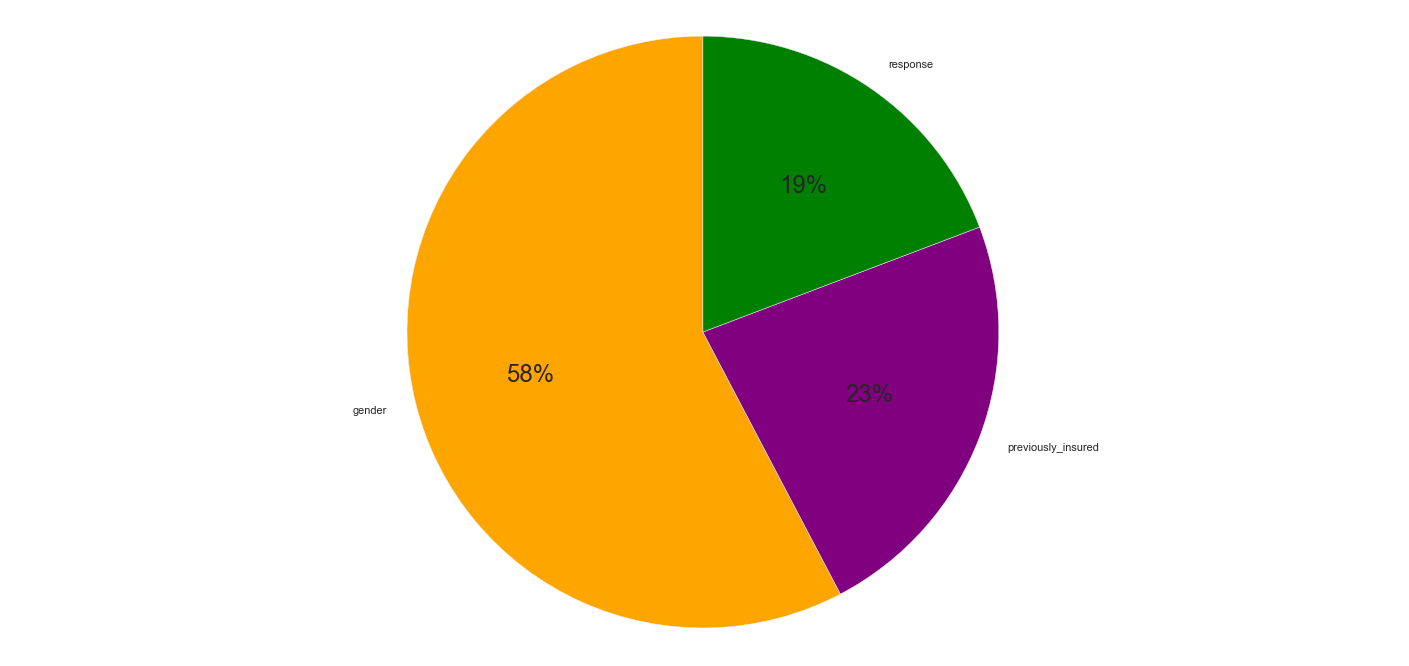

In [108]:
labels= ['gender', 'previously_insured', 'response']

colors=['orange', 'purple', 'green']

sizes= [1500, 600, 500]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%.0f%%')

plt.axis('equal')

plt.show()


aux2 = df4[["id", "gender", "previously_insured" , 'response']].groupby(["gender", "previously_insured", 'response']).count().reset_index()
aux2.columns=[["gender", "previously_insured",'response','total']]



response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


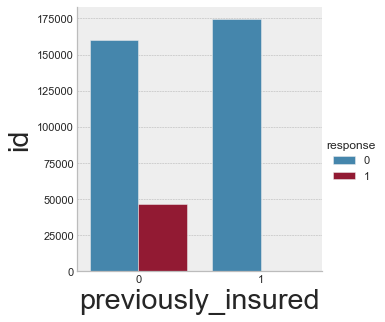

In [130]:
aux2 = df4[['id', 'previously_insured', 'response']].groupby( ['previously_insured', 'response'] ).count().reset_index()
sns.catplot( x='previously_insured', y='id', hue='response', kind='bar', data=aux2);

pd.crosstab(df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1 )

##### H3. Donos de carros com mais de 2 anos fazem menos seguro veicular.
***R.*** Verdadeiro

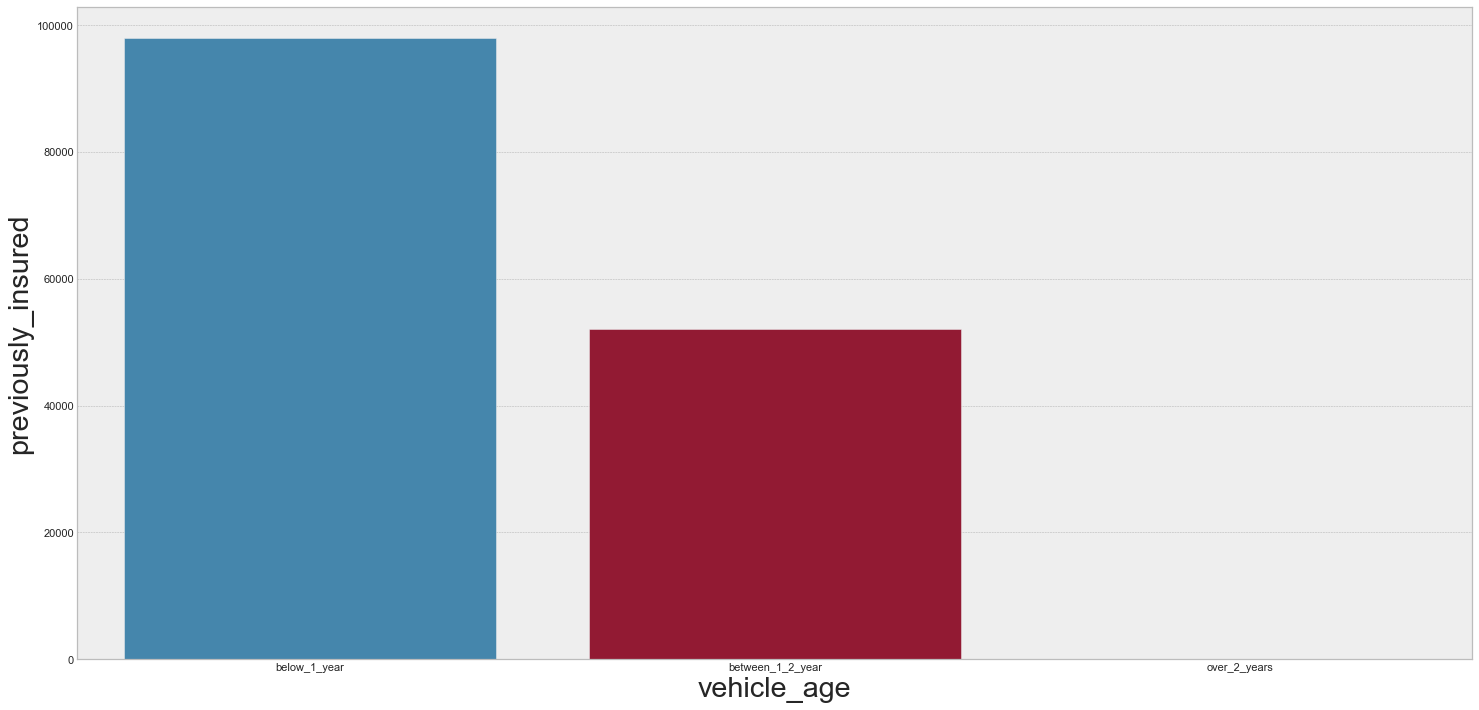

In [86]:
# Agrupar Features Vehicle Age e previously_insured
#aux1 = df4[(df4["vehicle_age"]="over_2_years") & (df4["previously_insured"].groupby("vehicle_age").mean().reset_index()
#aux1.plot()

aux3 = aux[["vehicle_age", "previously_insured"]].groupby(["vehicle_age"]).sum().reset_index()
sns.barplot(x="vehicle_age", y="previously_insured", data=aux3);


##### H4. Quem adquire seguro veicular possue habilitação veicular.
***R.*** Verdadeiro

In [87]:
# Agrupar previously_insured =1 com driving_license = 1

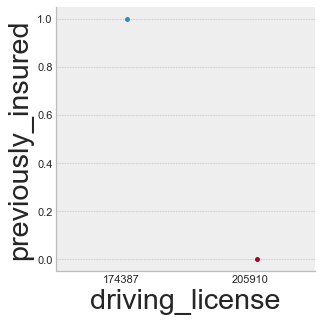

In [209]:
aux4 = df4[["previously_insured","driving_license"]].groupby("previously_insured").sum().reset_index()
sns.catplot(x="driving_license", y="previously_insured", data=aux4);


##### <s>H5.Carros com mais de 2 anos não costuma ter seguro veicular.</s>
R.

##### H6. Carros mais novos costumam ter seguro veicular.
***R.*** Verdadeiro

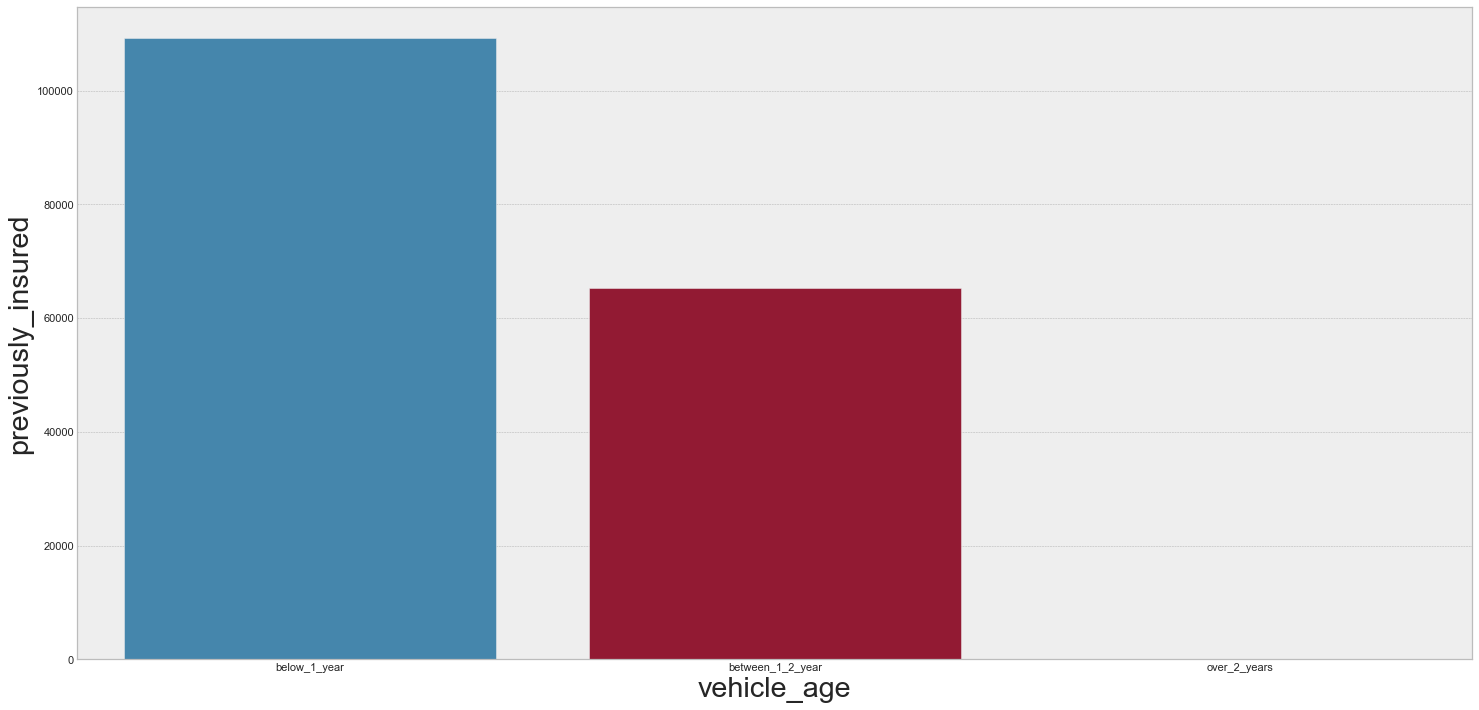

In [92]:
# Agrupar vehicle_age e previously_insured
aux1 = df4[["vehicle_age", "previously_insured"]].groupby("vehicle_age").sum().reset_index()
sns.barplot(x="vehicle_age", y="previously_insured", data=aux1);


#####<s> H7. Quem já possui seguro veicular não tem interesse em adiquirir outro.</s>
***R.***

In [123]:
#aux1 = df4[["previously_insured", "response"]].groupby("response").sum().reset_index()

#plt.subplot()
#sns.barplot(x="previously_insured", y="response", data=aux1);

##### H8. Quem não possui seguro veicular é mais sucetível a adiquirir seguro veicular.
***R.*** Verdadeiro

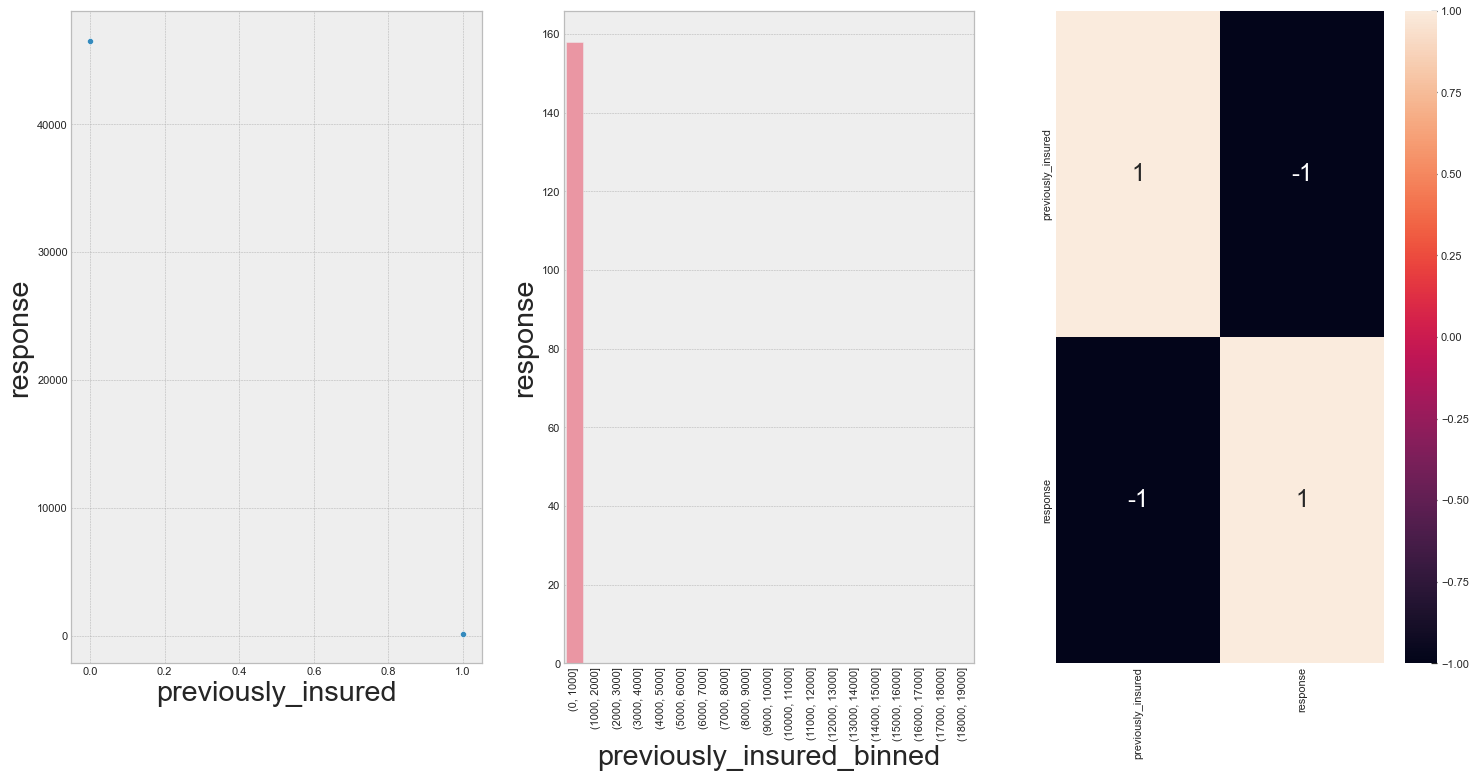

In [105]:
# Agrupar previously_insured e response
#aux1 = df4[(df4["previously_insured"]== 0) & (df4["response"]== 1)].groupby("previously_insured").sum().reset_index()
#aux1.plot()

aux1 = df4[["previously_insured", "response"]].groupby("previously_insured").sum().reset_index()

plt.subplot (1,3,1)
sns.scatterplot(x="previously_insured",y="response",data=aux1);

plt.subplot (1,3,2)
bins = list(np.arange(0,20000,1000))
aux1["previously_insured_binned"] = pd.cut(aux1["previously_insured"], bins=bins)
aux2 = aux1[["previously_insured_binned", "response"]].groupby("previously_insured_binned").sum().reset_index()
sns.barplot(x="previously_insured_binned", y="response", data=aux2);
plt.xticks (rotation = 90);

# correlação
plt.subplot (1,3,3)
x=sns.heatmap (aux1.corr(method="pearson"),annot=True);
#rodar os numeros 90 graus para ler melhor (não deixar amontoados)
plt.xticks (rotation = 90);


##### H9. Homens tem mais interesse em adquirir seguro veicular.
***R.*** Falso

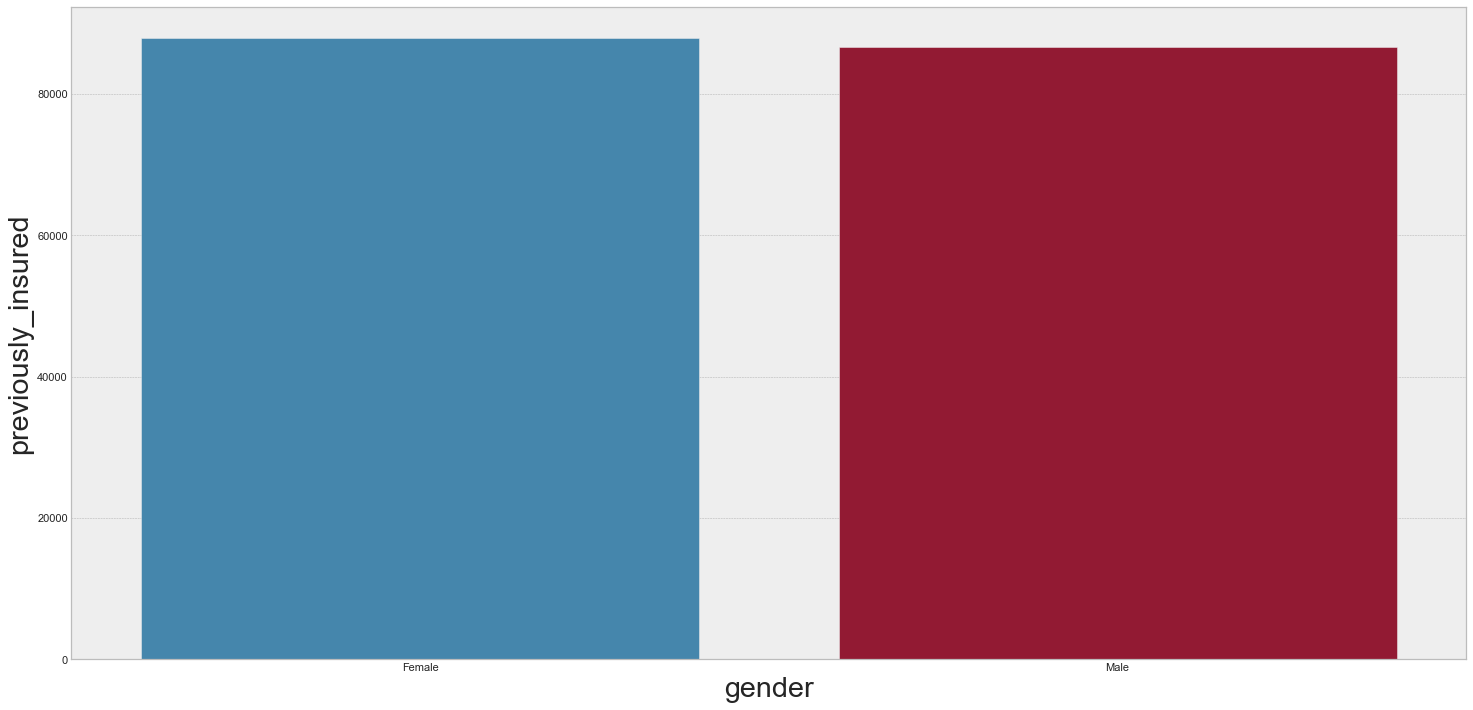

In [106]:
# Agrupar gender e previously_insured
aux1 = df4[["gender","previously_insured"]].groupby("gender").sum().reset_index()
sns.barplot(x="gender",y="previously_insured",data=aux1);



##### <s> H10. Mulheres tem menos interesse em adquirir seguro veicular.</s>
***R.***

### 4.2.1 Resumo das Hipóteses


In [131]:
# de acordo com o que vimos acima, nas validações das hipóteses
tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
['H1', '-', '-'],
['H2', 'Falsa', 'Alta'],
['H3', 'Verdadeira', 'Media'],
['H4', 'Verdadeira', 'Baixa'],
['H5', '-', '-'],
['H6', 'Verdadeiro', 'Media'],
['H7', '-', '-'],
['H8', 'Verdadeira', 'Alta'],
['H9', 'Falsa', 'Media'],
['H10', '-', '-'],
]
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           -            -
H2           Falsa        Alta
H3           Verdadeira   Media
H4           Verdadeira   Baixa
H5           -            -
H6           Verdadeiro   Media
H7           -            -
H8           Verdadeira   Alta
H9           Falsa        Media
H10          -            -


## 4.3 Análise multivariada

### 4.3.1 Numerical Attributes

In [132]:
# aqui apenas para olhar se temos variáveis numéricas
num_attributes.head()

,age,annual_premium,vintage
0,44,40454.0,217
1,76,33536.0,183
2,47,38294.0,27
3,21,28619.0,203
4,29,27496.0,39


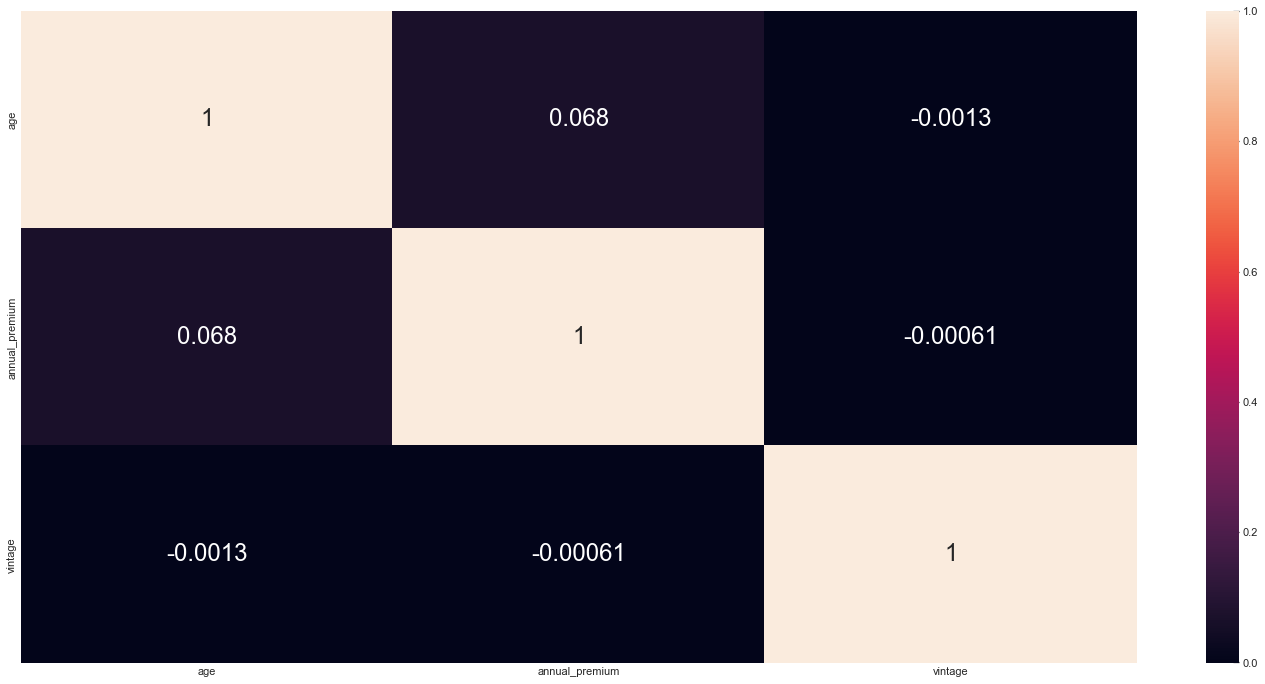

In [133]:
# fazer correlação entre todas as variáveis
# p.s Método de Pearson é para fazer a correlação entre duas variáveis numéricas 
correlation=num_attributes.corr(method="pearson")
sns.heatmap(correlation, annot=True);

### 4.3.2 Categorical Attributes

In [134]:
# p.s Método de Cramer V (correlação entre variáveis numéricas + categóricas ou entre variáveis categóricas)
# aqui para ver se só temos variáveis categóricas
# aqui estou pegando o dataset da análise descritiva, então está defasado
cat_attributes.head()

,gender,driving_license,previously_insured,vehicle_age,vehicle_damage,response
0,Male,1,0,> 2 Years,Yes,1
1,Male,1,0,1-2 Year,No,0
2,Male,1,0,> 2 Years,Yes,1
3,Male,1,1,< 1 Year,No,0
4,Female,1,1,< 1 Year,No,0


In [135]:
df4.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,over_2_years,1,40454.0,26,217,1
1,2,Male,76,1,3,0,between_1_2_year,0,33536.0,26,183,0
2,3,Male,47,1,28,0,over_2_years,1,38294.0,26,27,1
3,4,Male,21,1,11,1,below_1_year,0,28619.0,152,203,0
4,5,Female,29,1,41,1,below_1_year,0,27496.0,152,39,0


In [136]:
def cramer_v( x, y):
    cm = pd.crosstab(x, y).to_numpy()
    n = cm.sum()
    r,k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0 , chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
   
    return np.sqrt( (chi2corr/n) / (min( kcorr-1, rcorr-1 ) ) )  

def cramers_v_df(categorical_features):

    rows= []

    for var1 in categorical_features:

        col = []

        for var2 in categorical_features:
            cramers =cramer_v(categorical_features[var1], categorical_features[var2]) 
            col.append(round(cramers,3)) 

        rows.append(col)

    cramers_results = np.array(rows)
    df = pd.DataFrame(cramers_results, columns=categorical_features.columns, index=categorical_features.columns)

    return df

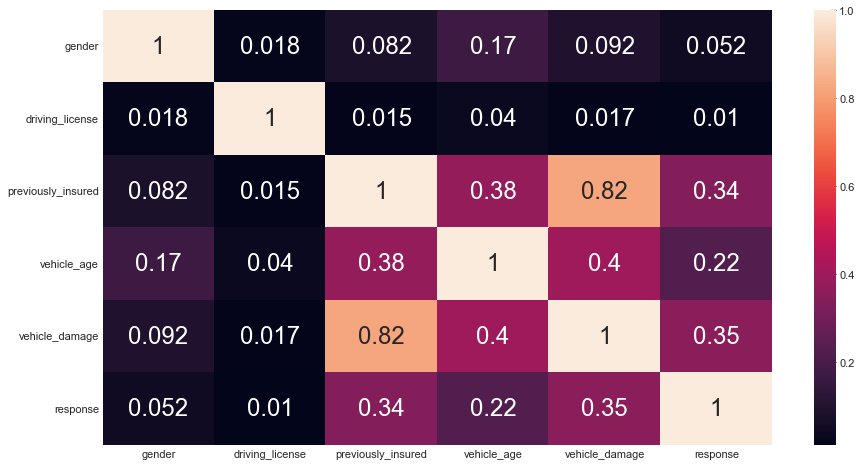

In [137]:
cat_features = cat_attributes

# dataframe with cramer-v 
cramer_v_dataframe = cramers_v_df(cat_features)

# create a mask
mask = np.zeros_like(cramer_v_dataframe, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# display heatmap
plt.subplots(figsize=(15, 8))
sns.heatmap( cramer_v_dataframe, annot = True);

#esse abaixo muda o formato do gráfico de correlação
#sns.heatmap( cramer_v_dataframe, annot = True, mask=mask);

# 5.0 Data Preparation

In [138]:
df5 = df4.copy()

In [139]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,over_2_years,1,40454.0,26,217,1
1,2,Male,76,1,3,0,between_1_2_year,0,33536.0,26,183,0
2,3,Male,47,1,28,0,over_2_years,1,38294.0,26,27,1
3,4,Male,21,1,11,1,below_1_year,0,28619.0,152,203,0
4,5,Female,29,1,41,1,below_1_year,0,27496.0,152,39,0


In [140]:
df5.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='Count'>

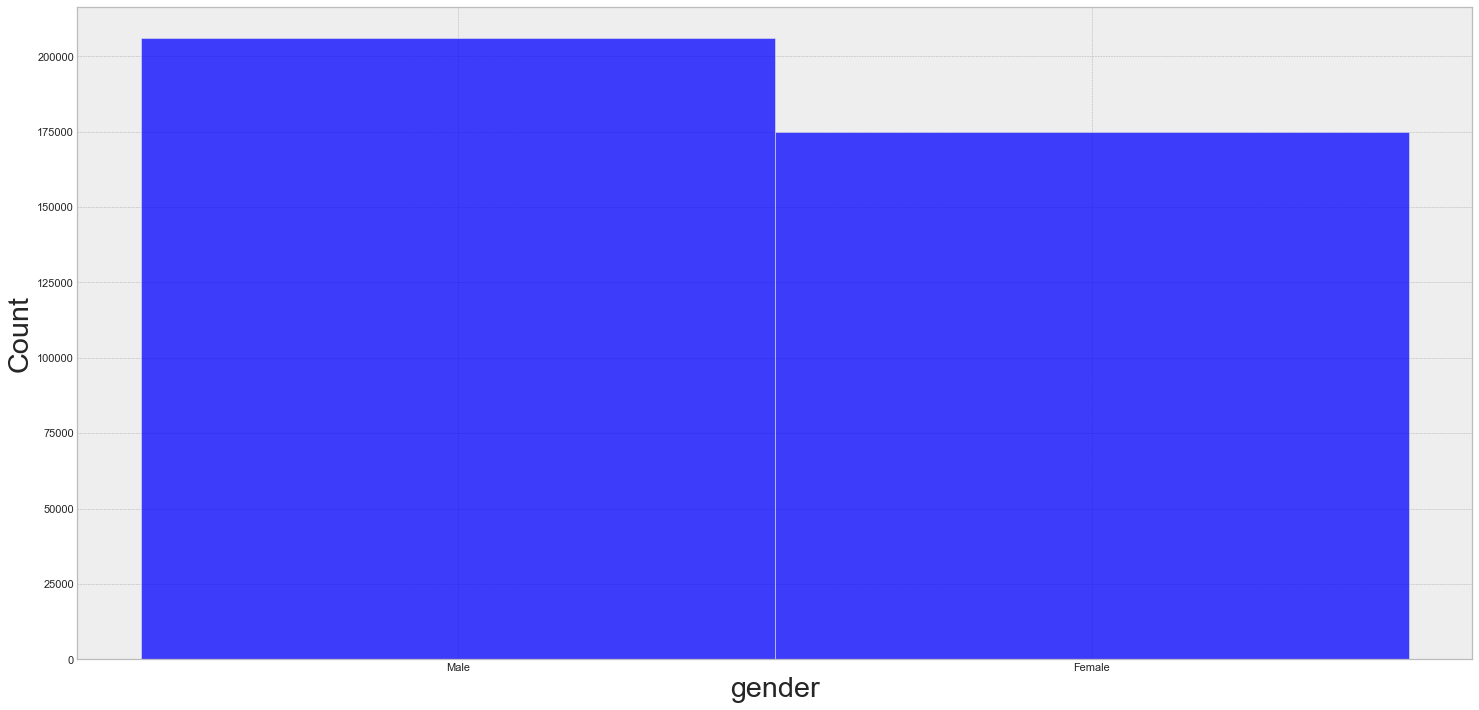

In [141]:
#aqui vemos onde colocaremos cada feature nas etapas abaixo
sns.histplot(df5["gender"]) #aqui é só ir trocando o nome da váriavel


In [142]:
#separando dados para treino e test

X = df4.drop("response", axis=1) #aqui retiro a feature response
y = df4["response"].copy() #aqui adiciono a feature a variável y 

#separando em treino e validação
x_train, x_validation, y_train, y_validation = mms.train_test_split( X, y, test_size=0.20)

#concatenar o x_train e o y_train e colocar em df5
df5 = pd.concat([x_train, y_train], axis=1)



## 5.1 Standardization 
##### ( calcula a média e o desvio padrão)

In [143]:
ss = pp.StandardScaler()
#annual_premium
#como aqui só tem uma feature, não precisei identificar
df5["annual_premium"] = ss.fit_transform(df5[["annual_premium"]].values) # o que está dentro de [[]] me passa um array
pickle.dump(ss, open("/Users/raquelrocha/Documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/features/annual_premium_scaler.pkl", "wb"))


In [144]:
#P.S.
df5["annual_premium"].head() # me mostra a series com dataframe
df5[["annual_premium"]].head() # me dá uma coluna
df5[["annual_premium"]].values # me dá só o que tem dentro e me retorna um array


array([[ 0.42023794],
       [ 1.33943761],
       [ 0.07257252],
       ...,
       [ 0.57438763],
       [ 0.34766954],
       [-0.44162806]])

## 5.2 Rescaling
##### (Quando faz reescala dos intervalos, ficando em 0 e 1 )

In [145]:
#por ter mais de uma feature tive que identificar
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

#age
df5["age"] = mms_age.fit_transform(df5[["age"]].values)
pickle.dump(mms_age, open("/Users/raquelrocha/Documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/features/age_scaler.pkl", "wb"))

#vintage
df5["vintage"] = mms_vintage.fit_transform(df5[["vintage"]].values)
pickle.dump(mms_vintage, open("/Users/raquelrocha/Documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/features/vintage_scaler.pkl", "wb"))


## 5.3 Encoder
##### (quando mudamos o tipo de variável de categórica para númerica,  respeitando no máximo sua natureza )

In [146]:

#driving_license - essa feature já está em 0 e 1 então já está "encodado"

#region_code 
#Label Encoding (mapeia se tem ou não tem Ex: 0 e 1)

#One Hot Encoding (identifica um estado Ex:0 e 1), nesse caso tem 52 (não indicado)
#P.S. quando tem muitos(acima de 6/7) níveis em sua variável categórica, se usar uma hot encoding irá criar muitas dimensões no dataset que a amostra de dimensionalidade irá acabar com o modelo

#aqui podemos usar qualquer um desses, o Meigarom indica o Target Encoding, no prmeiro ciclo 
#Frequency Encoding (conta a frequência, quantas pessoas tem a licença por classe)
#Target Encoding (calcula a média, de quantas pessoas tem a licença e divide pelo total de pessoas daquele grupo)
#Weighted Target Encoding (dar peso manual para a variável Ex: quanto maior o peso mais próximo fica da média, e quanto menor o peso fica mais distante da média)


#previously_insurence - essa feature já está em 0 e 1 então já está "encodado"


#vehicle_age
#Order Encoding (mapeia a ordem ex: 2 anos seria 2x de 1 ano, e 3 anos seria 3x de 1 ano e assim vai)
#One Hot Encoding (identifica um estado Ex: velho e novo)
#Frequency Encoding (conta a frequência, quantos carros que são velhos, quantos carros que são novos)


#vehicle_damage - essa feature já está em 0 e 1 então já está "encodado"


#policy_sales_channel
#Frequency Encoding (conta a frequência, qual tipo de contato o cliente quer ter)
#Target Encoding (calcula a média, de quantas pessoas tem a licença e divide pelo total de pessoas daquele grupo)

#P.S. função Get_dummys (pandas), é igual ao Hot Encoding


In [147]:
#aplicando o encoding

#gender
target_encode_gender = df5.groupby("gender")["response"].mean()
df5.loc[:, "gender"] = df5["gender"].map(target_encode_gender)
pickle.dump(target_encode_gender, open("/Users/raquelrocha/Documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/features/target_encode_gender_scaler.pkl", "wb"))

#region_code
#P.S. target encode tb conhecido como Mean Encoding
target_encode_region_code = df5.groupby("region_code")["response"].mean()
df5.loc[:,"region_code"] = df5["region_code"].map(target_encode_region_code)
pickle.dump(target_encode_region_code, open("/Users/raquelrocha/Documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/features/target_encode_region_code_scaler.pkl", "wb"))

#vehicle_age - Get_dummys
#aqui não usamos o pickle pq usamos o pandas para fazer a transformação
df5 = pd.get_dummies(df5, prefix="vehicle_age", columns=["vehicle_age"])

#policy_sales_channel - Frequency Encoding
fe_policy_sales_channel = df5.groupby("policy_sales_channel").size()/len(df5)
df5.loc[:, "policy_sales_channel"] = df5["policy_sales_channel"].map(fe_policy_sales_channel)
pickle.dump(fe_policy_sales_channel, open("/Users/raquelrocha/Documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/features/fe_policy_sales_channel_scaler.pkl", "wb"))


## 5.4 Validation Preparation
##### deixar pronto os dados de validação

In [148]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_below_1_year,vehicle_age_between_1_2_year,vehicle_age_over_2_years
12799,12800,0.103475,0.030769,1,0.079935,1,0,0.420238,0.001610,0.595156,0,1,0,0
124661,124662,0.138937,0.061538,1,0.187078,1,0,1.339438,0.353144,0.564014,0,1,0,0
197775,197776,0.138937,0.476923,1,0.167070,0,1,0.072573,0.026092,0.259516,0,0,1,0
104874,104875,0.138937,0.200000,1,0.187078,0,1,-0.613629,0.194387,0.830450,1,0,1,0
204466,204467,0.138937,0.353846,1,0.187078,0,1,0.509669,0.194387,0.141869,0,0,1,0


In [149]:
#P.S. pega os encoders e coloca no teste

# gender
x_validation.loc[:, "gender"] = x_validation.loc[:, "gender"].map(target_encode_gender)

# age
x_validation.loc[:, "age"] = mms_age.fit_transform( x_validation[["age"]].values )

# region_code
x_validation.loc[:, "region_code"] = x_validation.loc[:, "region_code"].map(target_encode_region_code)

# vehicle_age
x_validation = pd.get_dummies(x_validation, prefix="vehicle_age", columns=["vehicle_age"])

# annual_premium
x_validation.loc[:, "annual_premium"] = ss.fit_transform( x_validation[["annual_premium"]].values )

# policy_sales_channel
x_validation.loc[:, "policy_sales_channel"] = x_validation.loc[:, "policy_sales_channel"].map(fe_policy_sales_channel)

# vintage
x_validation.loc[:, "vintage"] = mms_vintage.transform( x_validation[["vintage"]].values )

#foi colocado essa substituição pq encontramos alguns dados NA que tem no teste mas não tem no treino
# fillna
x_validation = x_validation.fillna( 0 )



/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/raquelrocha/opt/anaconda3/envs/env_cross_sell/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A 

# 6.0 Feature Selection

## 6.2 Feature Importance

In [150]:
# iremos pela importancia das árvores pq boruta selecionou apenas 1 feature

#model definition
forest = en.ExtraTreesClassifier(n_estimators = 250, random_state = 0, n_jobs = -1)

#data preparation
x_train_n = df5.drop (["id", "response"], axis=1)
y_train_n = y_train.values
forest.fit (x_train_n, y_train_n)


ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking
                        feature  importance
0                       vintage    0.272917
0                annual_premium    0.244370
0                           age    0.164697
0                   region_code    0.104804
0                vehicle_damage    0.068327
0          policy_sales_channel    0.060817
0            previously_insured    0.056531
0      vehicle_age_below_1_year    0.013687
0  vehicle_age_between_1_2_year    0.006288
0                        gender    0.004788
0      vehicle_age_over_2_years    0.002253
0               driving_license    0.000522


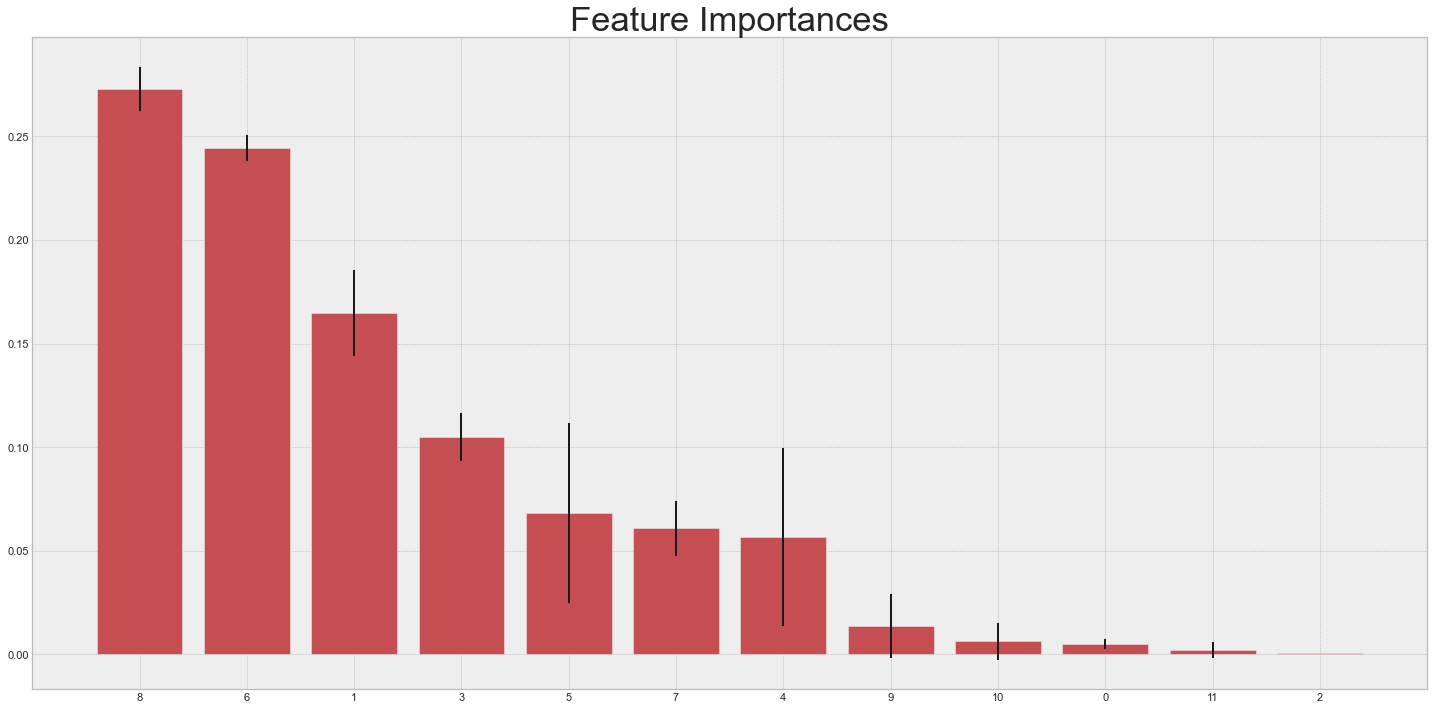

In [151]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print('Feature Ranking')
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_):
    aux = pd.DataFrame( {'feature': i , 'importance': j}, index=[0])
    df = pd.concat( [df, aux], axis=0 )

print( df.sort_values( 'importance', ascending=False) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title('Feature Importances')
plt.bar( range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks( range(x_train_n.shape[1]), indices)
plt.xlim( [-1, x_train_n.shape[1]])
plt.show()

# 7.0 Machine Learning

In [152]:
# Feature Importance:
cols_selected = ['annual_premium','vintage', 'age', 'region_code', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']

In [153]:
x_train = df5[ cols_selected ]
x_val = x_validation[ cols_selected ]
y_val = y_validation.copy()

In [154]:
x_train.sample(10)

,annual_premium,vintage,age,region_code,vehicle_damage,policy_sales_channel,previously_insured
302528,0.591192,0.442907,0.661538,0.187078,1,0.002263,0
219141,-1.624586,0.235294,0.123077,0.092886,0,0.057323,1
175675,0.984271,0.809689,0.307692,0.119530,1,0.000157,0
362614,-1.624586,0.446367,0.200000,0.089012,0,0.010004,1
98178,1.891434,0.539792,0.030769,0.187078,1,0.026092,0
178745,-0.334404,0.273356,0.076923,0.122905,1,0.353144,0
53412,-1.624586,0.453287,0.353846,0.114064,0,0.194387,1
222302,0.035125,0.612457,0.461538,0.106631,1,0.208802,0
95607,-0.292014,0.197232,0.046154,0.106631,0,0.353144,1
319001,0.840937,0.813149,0.015385,0.095600,1,0.057323,0


In [155]:
len(x_train.columns)

7

## 7.1 KNN

In [156]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model prediction - Poder de Generalização
# yhat_knn é onde guardo as predições
yhat_knn = knn_model.predict_proba( x_val )

In [157]:
knn_model.score( x_val, y_val )


0.8608538217312587

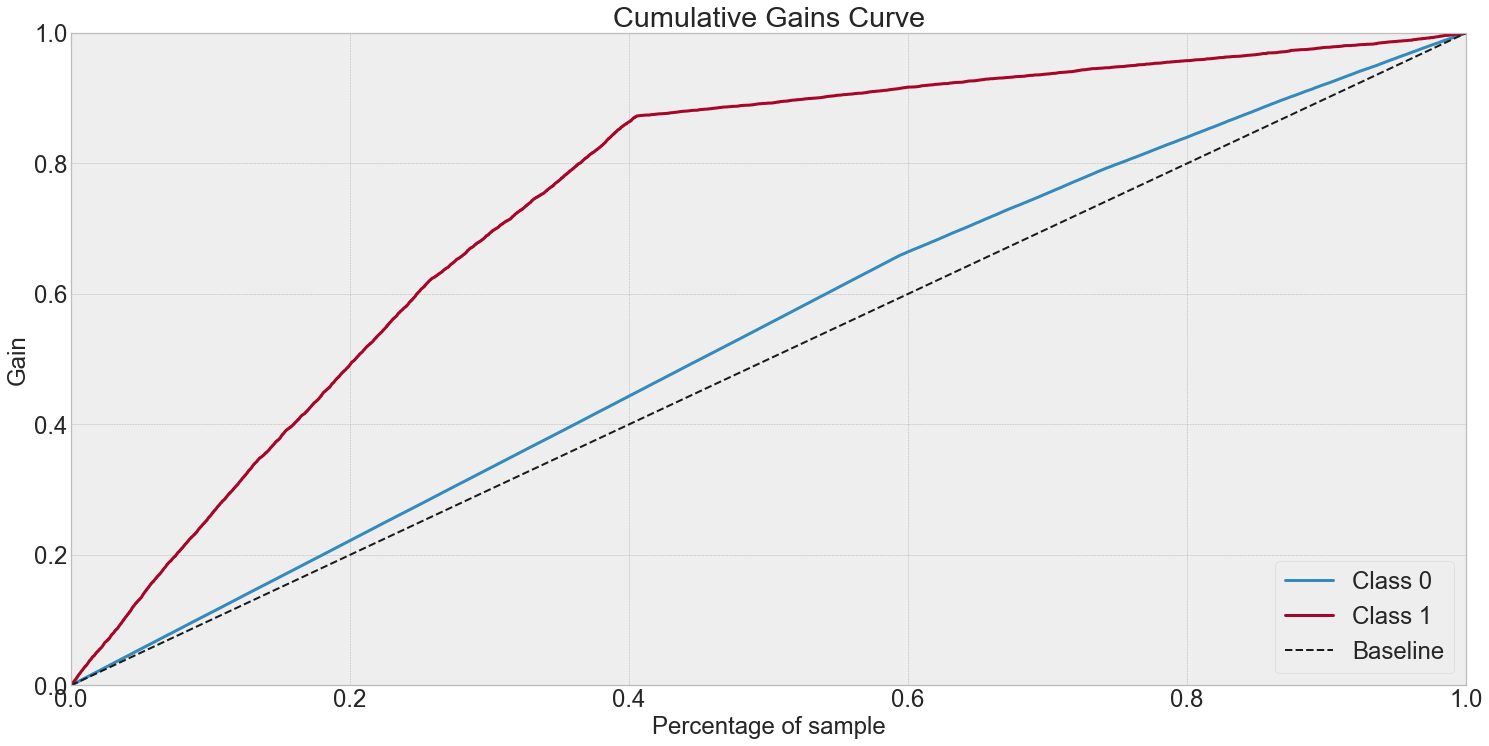

In [158]:
#Métricas de ordenação

# accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn);


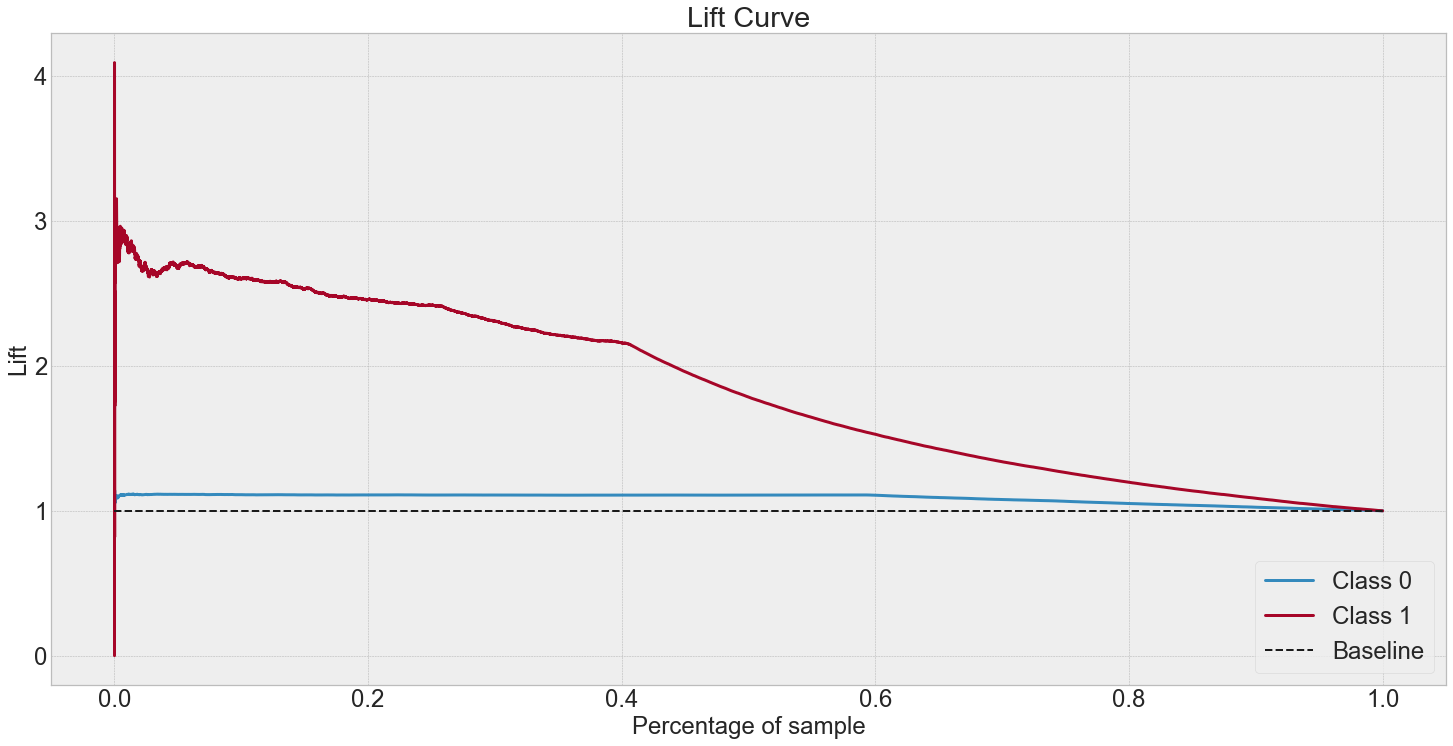

In [159]:
# Curva lift (quantas vezes o modelo e melhor)
skplt.metrics.plot_lift_curve(y_val, yhat_knn);

## 7.2 Logistic Regression

In [160]:
#Modelo Linear (Logistic_Regression)

#model definition
lr_model = lm.LogisticRegression(random_state=42)

#model_training
lr_model.fit(x_train, y_train)

#model prediction
yhat_lr = lr_model.predict_proba(x_val)


In [161]:
lr_model.score( x_val, y_val )


0.8778699063262575

In [162]:
x_train.sample(10)


,annual_premium,vintage,age,region_code,vehicle_damage,policy_sales_channel,previously_insured
21904,0.653120,0.404844,0.615385,0.187078,1,0.015799,0
133484,0.494202,0.878893,0.784615,0.187078,0,0.002644,1
229155,-0.771268,0.352941,0.092308,0.074948,1,0.353144,0
20786,-1.624586,0.795848,0.615385,0.095600,0,0.208802,1
106559,0.849775,0.065744,0.769231,0.095600,1,0.208802,0
107311,0.641432,0.785467,0.153846,0.119530,0,0.353144,1
141936,-0.394179,0.910035,0.276923,0.187078,0,0.353144,1
356933,0.600496,0.256055,0.338462,0.070518,1,0.194387,0
115425,1.261229,0.695502,0.876923,0.187078,0,0.194387,1
193684,-1.624586,0.238754,0.646154,0.095600,1,0.001679,0


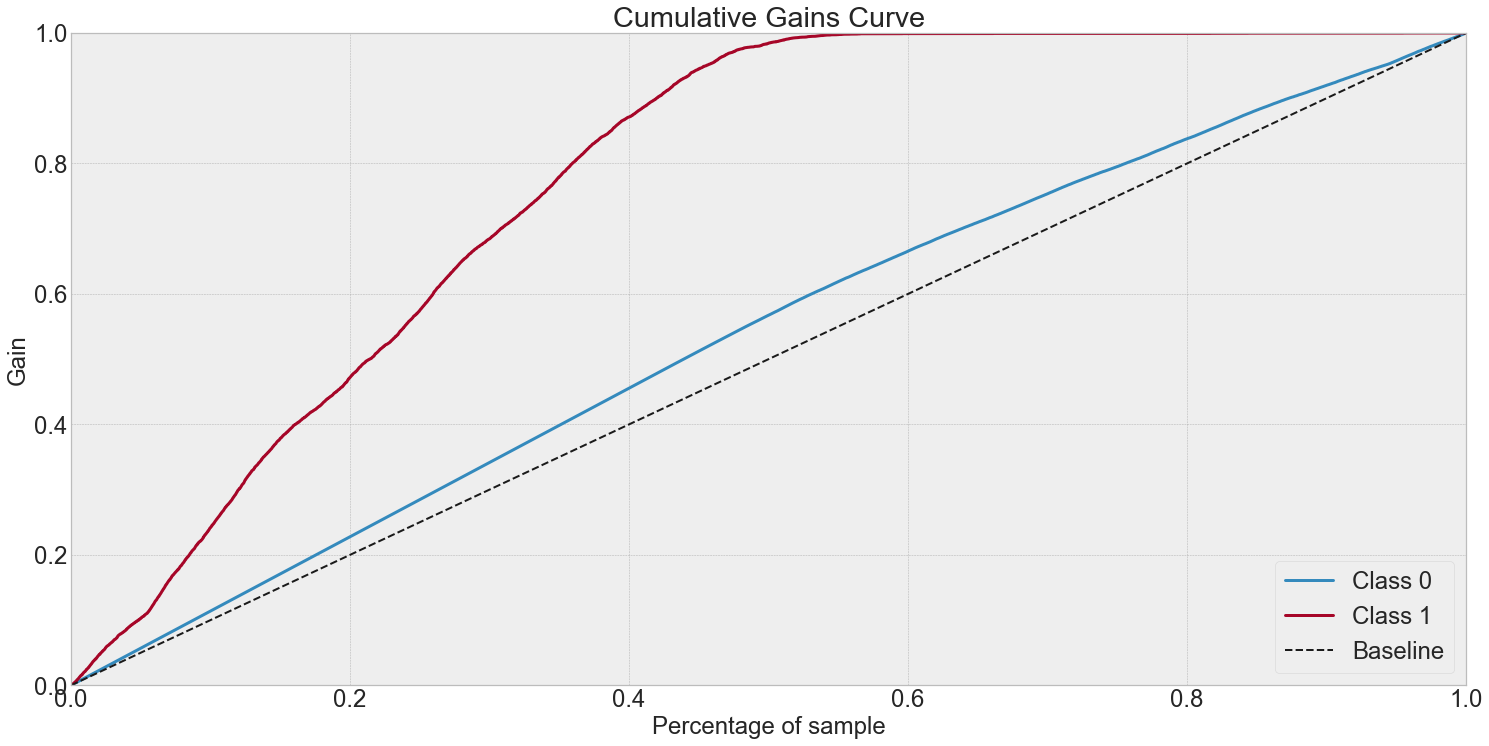

In [163]:
#accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr);

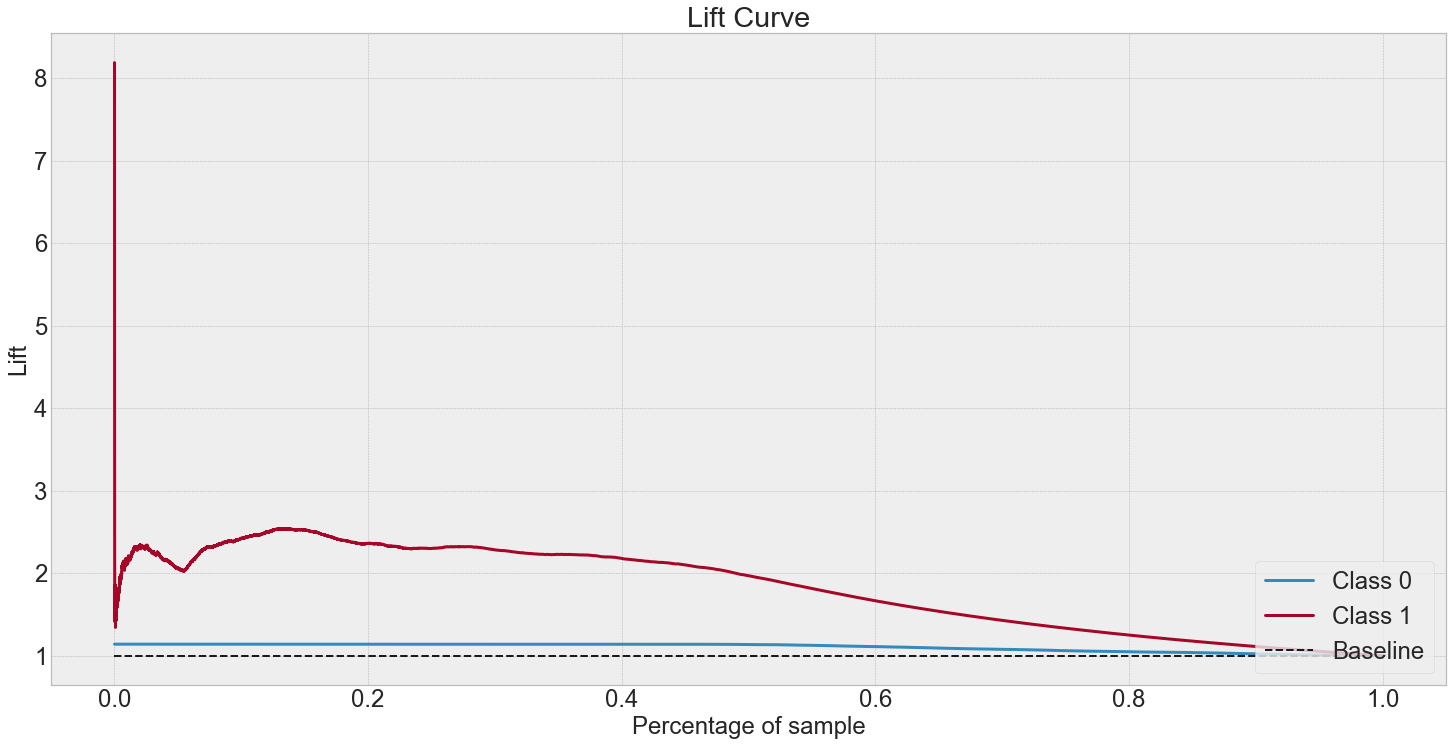

In [164]:
# Curva Lift (quantas vezes o modelo e melhor)
skplt.metrics.plot_lift_curve( y_val, yhat_lr );

## 7.3 Extra Trees Classifier

In [165]:
#model definition
et_model = en.ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

#model fit
et_model.fit (x_train, y_train)

#model predict
yhat_et = et_model.predict_proba(x_val)


In [166]:
et_model.score( x_val, y_val )


0.8599092125633019

In [167]:
#model predict (só para não ter que rodar novamente o modelo)
#yhat_et = et_model.predict_proba(x_val)

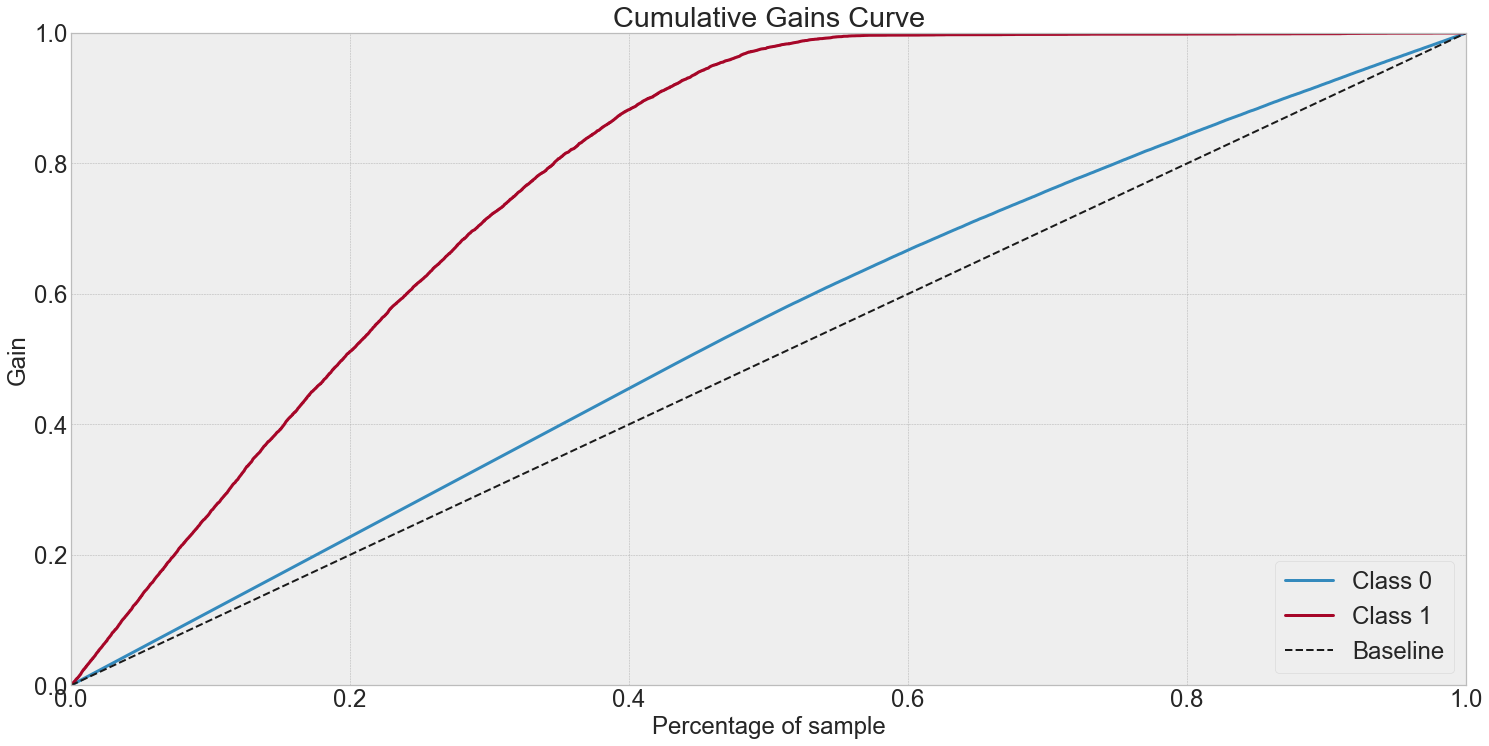

In [168]:
#Métricas de ordenação

# accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_et);


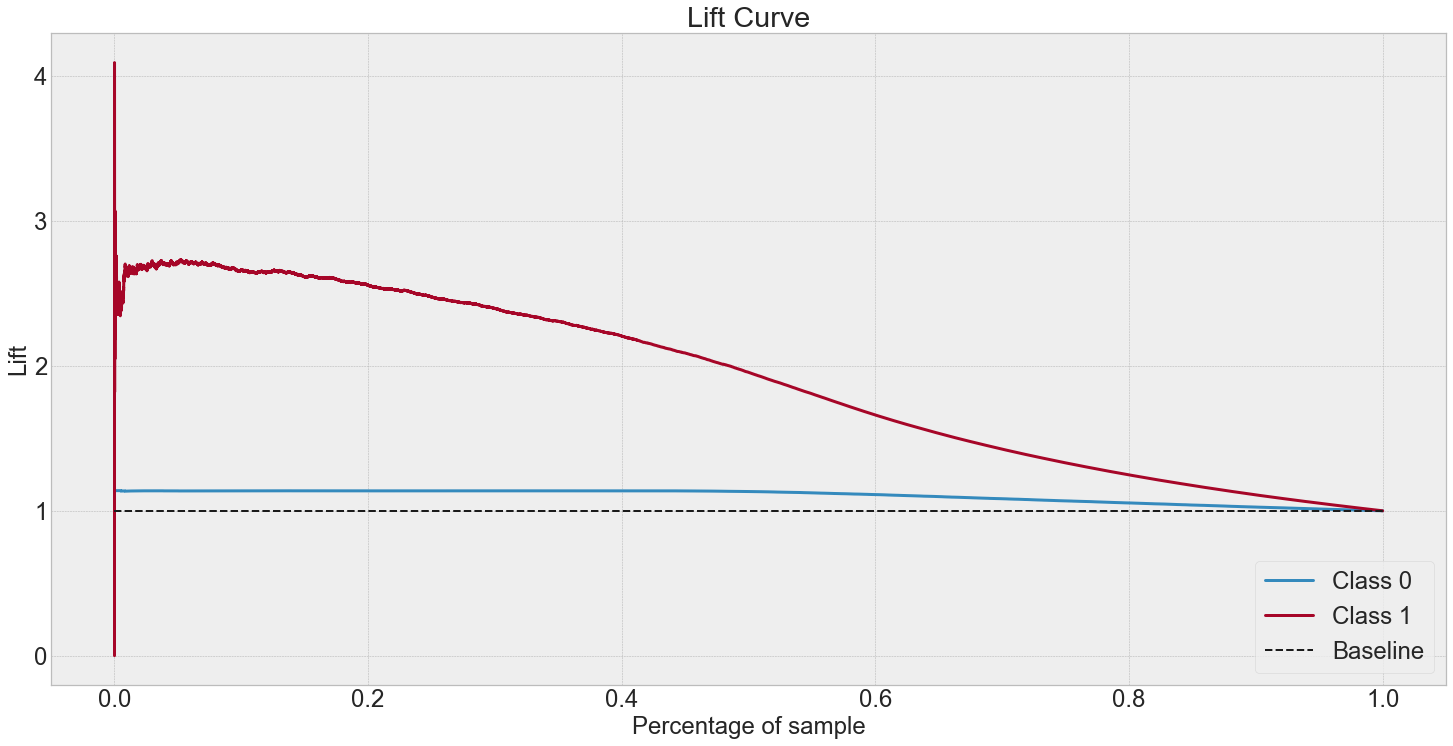

In [169]:
# Curva Lift (quantas vezes o modelo e melhor)
skplt.metrics.plot_lift_curve(y_val, yhat_et);


## 7.4 Random Forest Classifier

In [170]:
#model definition
rf_model = RandomForestClassifier(max_depth=10, random_state=42)

#model fit
rf_model.fit (x_train, y_train)

#model predict
yhat_rf = rf_model.predict_proba(x_val)


In [171]:
rf_model.score( x_val, y_val )


0.8778699063262575

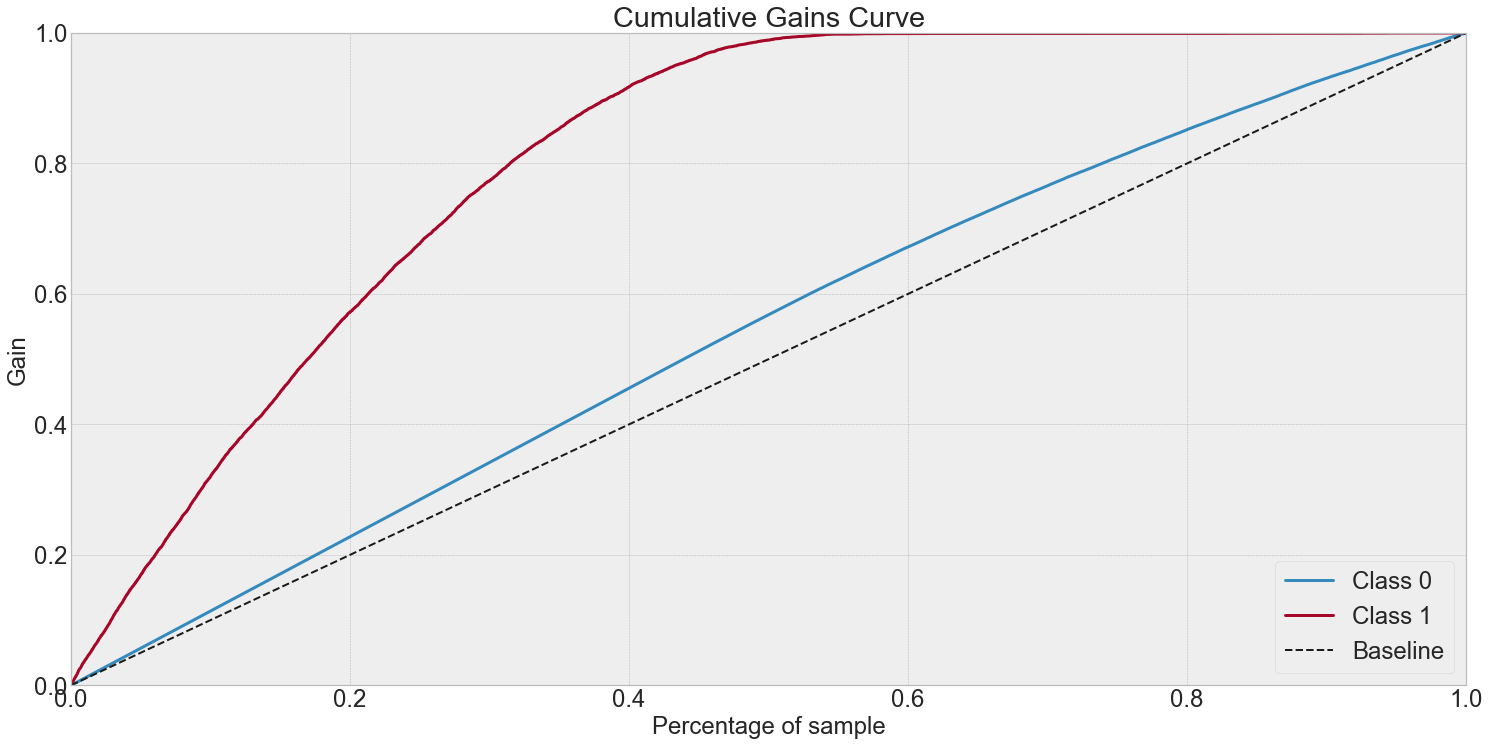

In [172]:
#Métricas de ordenação

# accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_rf);

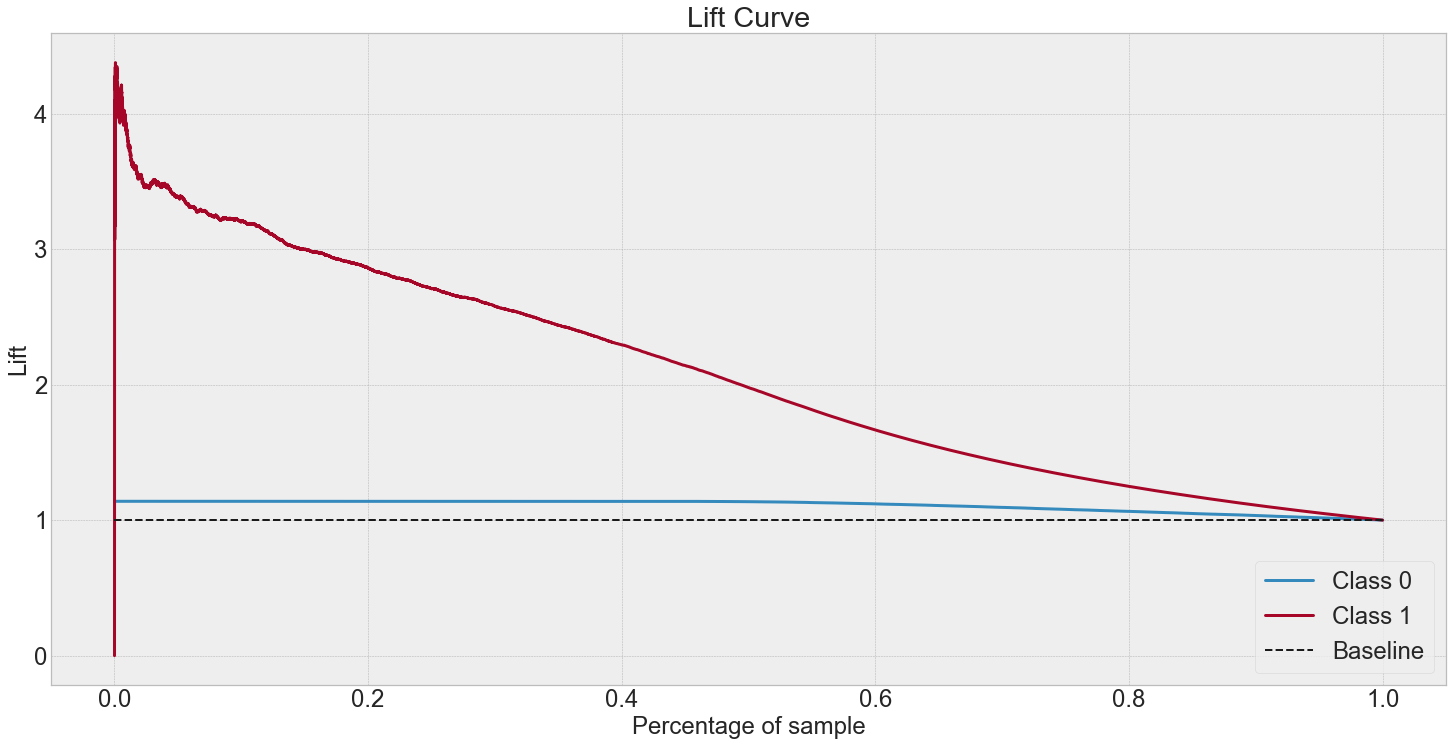

In [173]:
# Curva Lift (quantas vezes o modelo e melhor)
skplt.metrics.plot_lift_curve(y_val, yhat_rf);


## 7.5 Naive Bayes Classifier

In [174]:
#model definition
gnb_model = GaussianNB()

#model fit
gnb_model.fit (x_train, y_train)

#model predict
yhat_gnb = gnb_model.predict_proba(x_val)


In [175]:
gnb_model.score( x_val, y_val )


0.6375980687990344

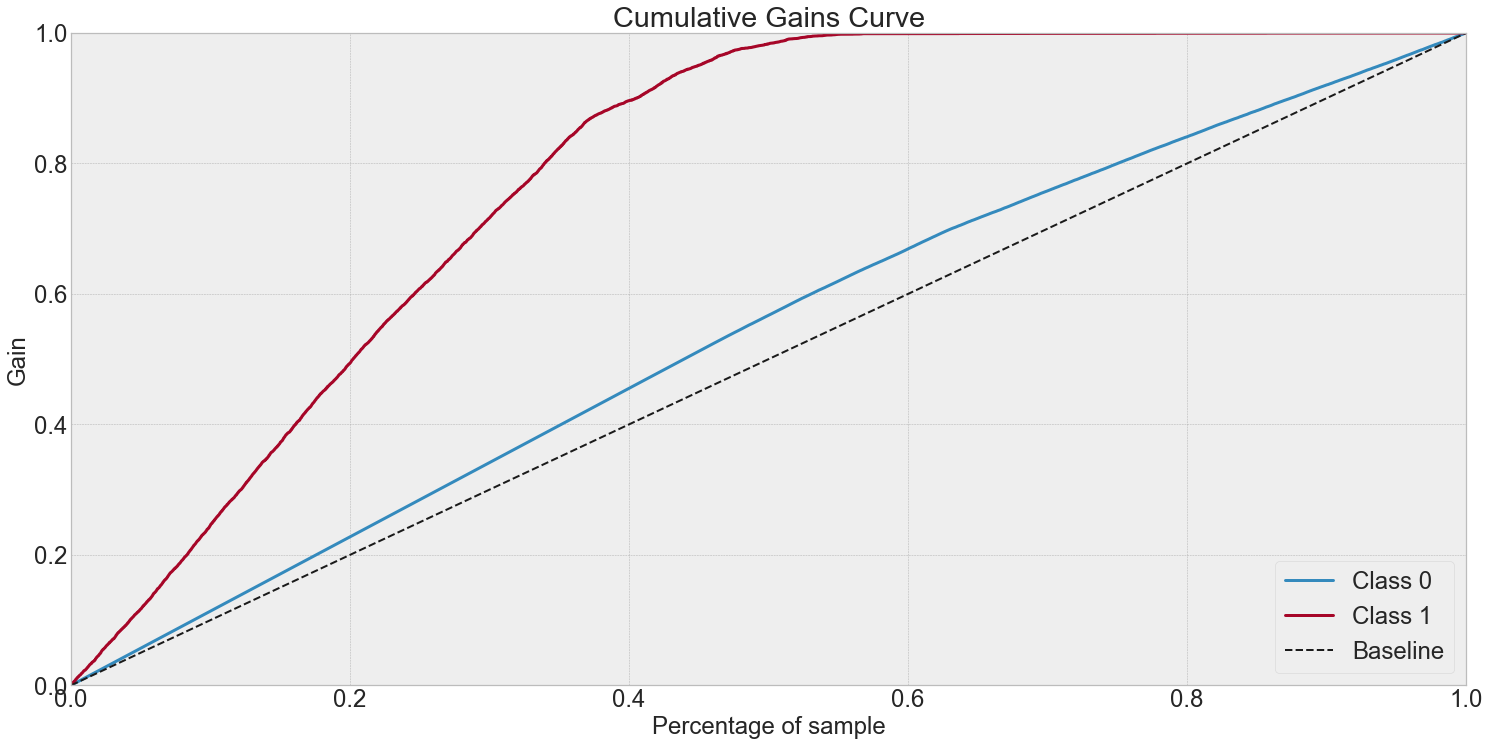

In [176]:
#Métricas de ordenação

# accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_gnb);

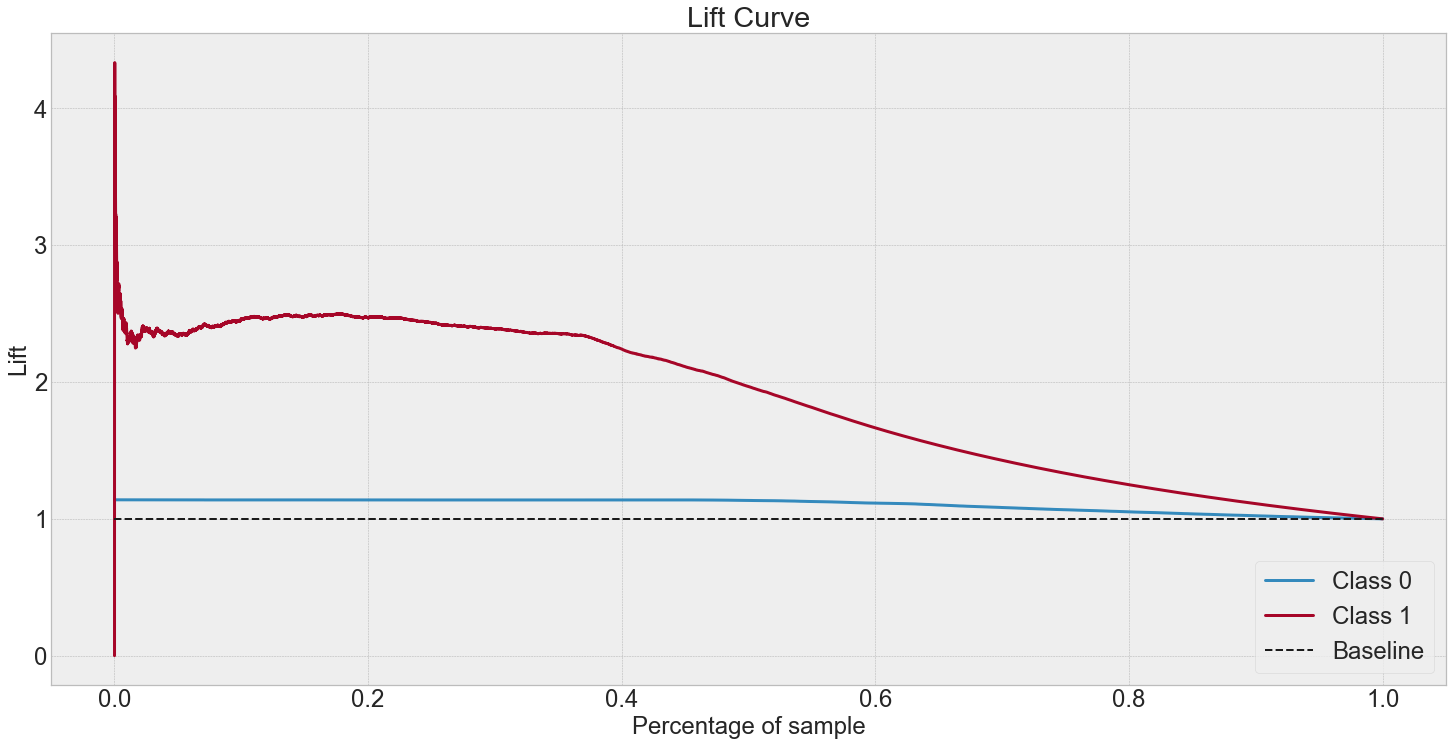

In [177]:
# Curva Lift (quantas vezes o modelo e melhor)
skplt.metrics.plot_lift_curve(y_val, yhat_gnb);


## 7.6 Light Gradient Boosting Machine Classifier (Esta reiniciando Kernel)

In [ ]:
#model definition
lgbm_model = LGBMClassifier(n_jobs =-1, max_depth=10)

#model fit
lgbm_model.fit (x_train, y_train)

#model predict
yhat_lgbm = lgbm_model.predict_proba(x_val)

In [ ]:
# accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lgbm);

In [ ]:
# Curva Lift (quantas vezes o modelo e melhor)
skplt.metrics.plot_lift_curve(y_val, yhat_lgbm);


## 7.7 XGBoost Classifier

In [178]:
#model definition
xgb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)

#model fit
xgb_model.fit (x_train, y_train)

#model predict
yhat_xgb = xgb_model.predict_proba(x_val)

In [179]:
xgb_model.score( x_val, y_val )


0.8768203405840833

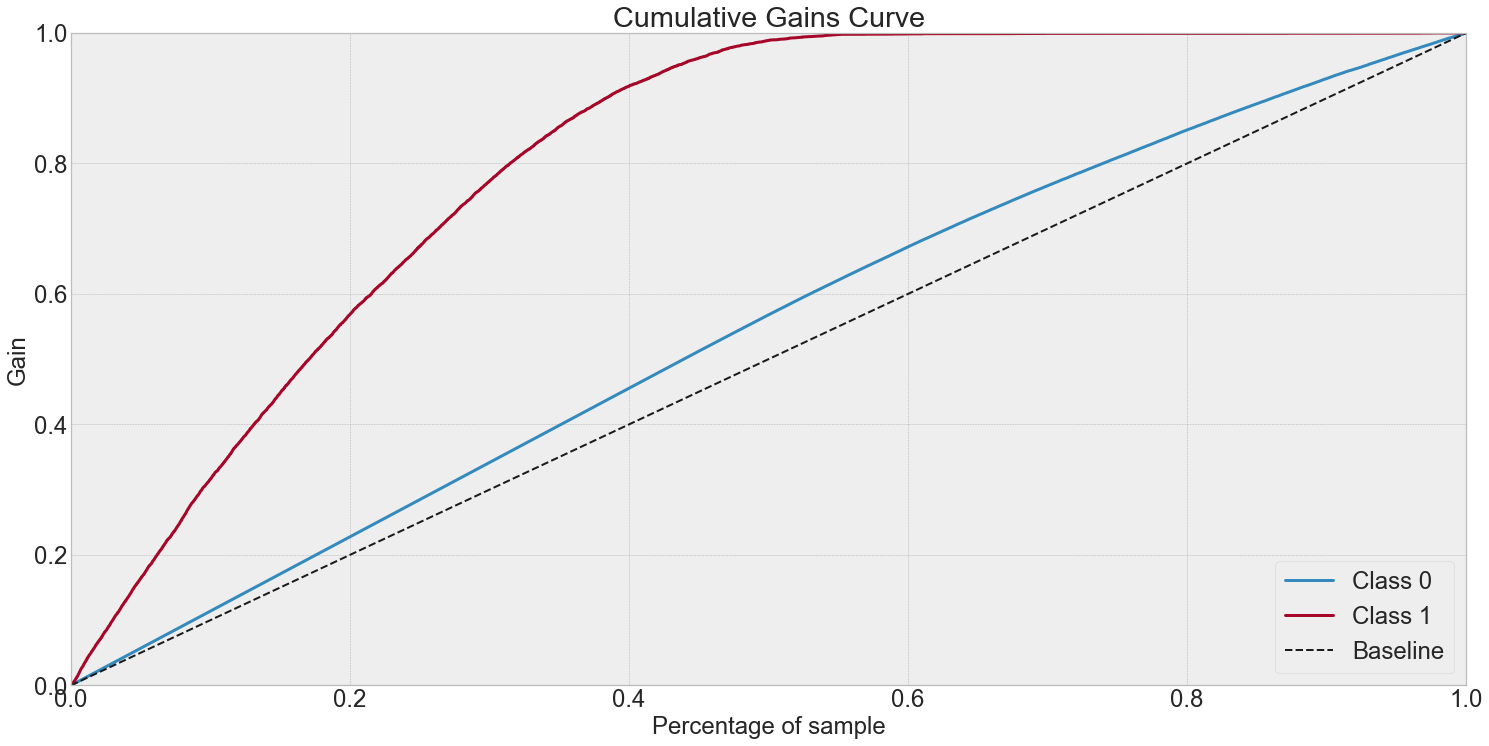

In [180]:
#Métricas de ordenação

# accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_xgb);

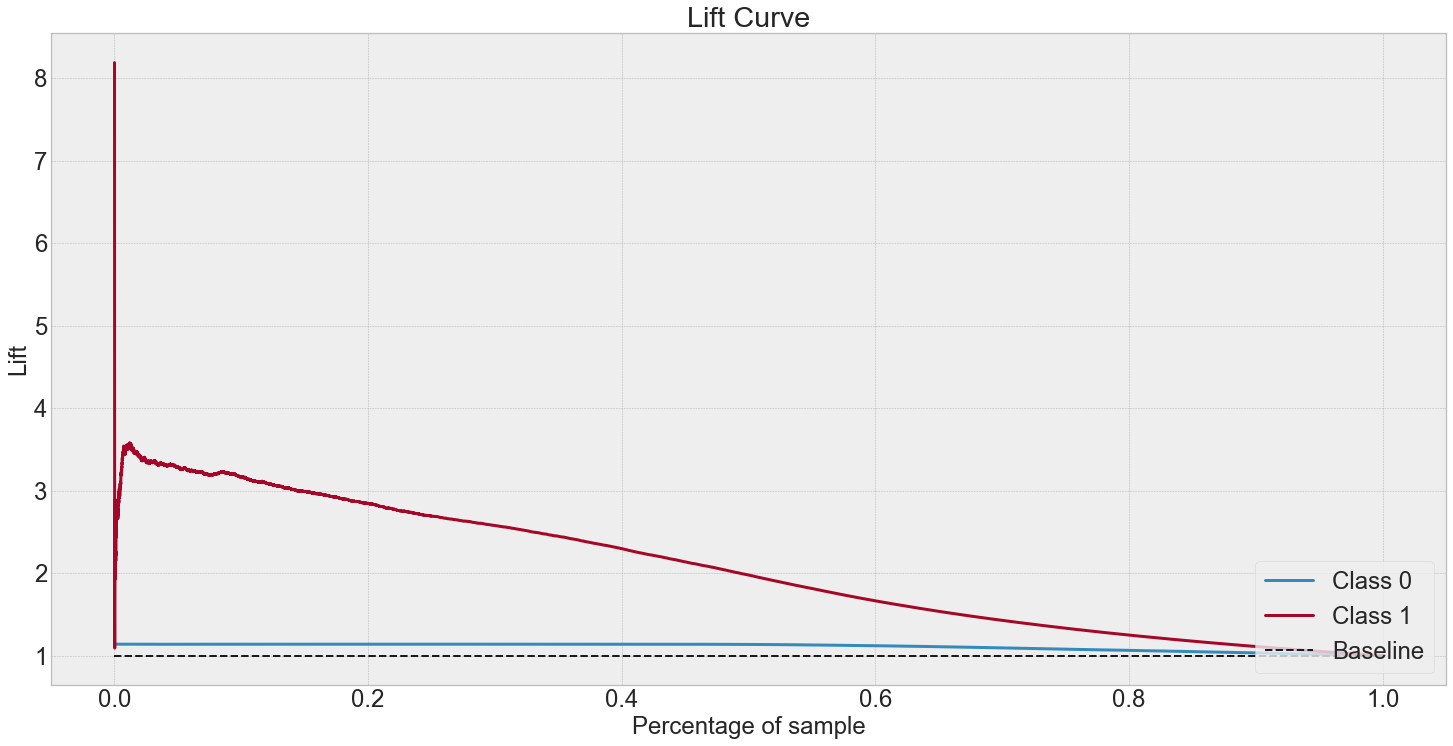

In [181]:
# Curva Lift (quantas vezes o modelo e melhor)
skplt.metrics.plot_lift_curve(y_val, yhat_xgb);


## Entendendo o que são as validações

In [186]:
x_val.size # as pessoas

533554

In [187]:
y_val.size # Propensão de compra (interesse)

76222

In [188]:
yhat_knn.size # Probabilidade da Propensão


152444

## 7.8 Precision and Recall

### Isso formou a função abaixo

In [ ]:
# aqui reparamos que não contem o ID, pq retiramos para treinar o modelo, o id virou o index
# df8 = x_val.copy() então mudamos as variaveis para validation, para incluir a variável id

df8 = x_validation.copy()
df8["response"] = y_validation.copy()

# Propensity Score(criou nova coluna, score)
df8["score"] = yhat_knn[:,1].tolist() # para virar um array

# Sorted clients by propensity score
df8 = df8.sort_values("score", ascending=False)

# Compute precision at K
precision_at_50 = precision_at_k(df8, k=50)
precision_at_50


In [ ]:
# aqui reparamos que não contem o ID, pq retiramos para treinar o modelo, o id virou o index
df8.head()


In [ ]:
# Na ordem de coluna: probabilidade de ser da classe 0 e da classe 1 
yhat_knn


In [ ]:
# Aqui transformo em lista
yhat_knn[:,1].tolist()


In [ ]:
# Propensity Score (criou nova coluna, score)
df8["score"] = yhat_knn[:,1].tolist() # para virar um array
df8.head()


In [ ]:
#aqui veremos no dataset apenas essas colunas
df8[["id", "response", "score"]].head()


In [ ]:
# Isso é o que virou a função abaixo

#reset o index
df8 = df8.reset_index(drop=True)

# Create Ranking Order (para começar do 1 = + 1)
df8["ranking"] = df8.index + 1

df8["precision_at_k"] = df8["response"].cumsum() / df8["ranking"]


df8[["id", "response", "score", "ranking", "precision_at_k"]].head()


#df8[["id", "response", "score"]].reset_index(drop=True).head()


### Função que foi usada

In [191]:
def precision_at_k(data, k=2000):
    #reset index
    data = data.reset_index(drop=True)
    
    #create ranking order
    data["ranking"] = data.index + 1

    data["precision_at_k"] = data["response"].cumsum() / data["ranking"]

    return data.loc[k, "precision_at_k"]
    


In [192]:
def recall_at_k(data, k=2000):
    #reset index
    data = data.reset_index(drop=True)
    
    #create ranking order
    data["ranking"] = data.index + 1

    data["recall_at_k"] = data["response"].cumsum() / data["response"].sum()

    return data.loc[k, "recall_at_k"]
    


In [193]:
# copy DataFrame
df8 = x_validation.copy()
df8["response"] = y_validation.copy()

#propensity score
df8["score"] = yhat_knn[:, 1].tolist()

#sorte clients by propensity score
df8 = df8.sort_values("score", ascending=False)

#compute precision at k
precision_at_50 = precision_at_k(df8, k=50)
print("Precision at K:{}".format(precision_at_50))

#compute precision at k
recall_at_50 = recall_at_k(df8, k=50)
print("Recall at K:{}".format(precision_at_50))


Precision at K:0.35294117647058826
Recall at K:0.35294117647058826


## 7.9 Cross Validation (não esta funcionando)

In [197]:
def cross_validation(model, model_name, x_train, y_train, num_folds , k=2000):
    # generate k-fold   
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
    
    # save k-fold's prediction
    precisionatk_list_cv = []
    recallatk_list_cv = []

    for train_cv, val_cv in kfold.split(x_train, y_train):
    
        # get fold
        x_train_fold = x_train.iloc[train_cv]
        y_train_fold = y_train.iloc[train_cv]

        x_val_fold = x_train.iloc[val_cv]
        y_val_fold = y_train.iloc[val_cv]

        # model definition
        model_fold = model

        # training model
        model_fold.fit(x_train_fold, y_train_fold)

        # prediction
        y_pred_fold = model_fold.predict_proba(x_val_fold)

        ## precision @K and recall @K
        # size of true values from target dataset
        k_size = k

        # add y_val to data to create score metrics 
        x_val_fold['response'] = y_val_fold.copy()

        # propensity score
        x_val_fold['propensity_score'] = y_pred_fold[:, 1].tolist()

        # compute precision at k
        precisionatk_cv = precision_at_k(x_val_fold, k=k_size)
        precisionatk_list_cv.append(precisionatk_cv)
        
        # compute recall at k
        recallatk_cv = recall_at_k(x_val_fold, k=k_size)
        recallatk_list_cv.append(recallatk_cv)
        
    
    precision_at_k_cv_mean = np.mean(precisionatk_list_cv)
    precision_at_k_cv_std = np.std(precisionatk_list_cv)
    
    recall_at_k_cv_mean = np.mean(recallatk_list_cv)
    recall_at_k_cv_std = np.std(recallatk_list_cv)
         
    return y_pred_fold, pd.DataFrame({'Model': model_name , 
                                      'Precision@k_CV': precision_at_k_cv_mean,
                                      'CV_STD': precision_at_k_cv_std,
                                      'Recall@k_CV': recall_at_k_cv_mean,
                                      'CV_STD_Recall': recall_at_k_cv_std}, index=[0])

In [203]:
# KNN
knn_result_cv = cross_validation(5, "KNN", knn_model, x_train, y_train)
knn_result_cv

# Logistic Regression
lr_result_cv = cross_validation(5, "Logistic Regression", lr_model, x_train, y_train)
lr_result_cv

# Extra Trees Classifier
et_result_cv = cross_validation(5, "Extra Trees Classifier", et_model, x_train, y_train)
et_result_cv

# Random Forest Classifier
rf_result_cv = cross_validation(5, "Random Forest Classifier", rf_model, x_train, y_train)
rf_result_cv

# Naive Bayes Classifier
gnb_result_cv = cross_validation(5, "Naive Bayes Classifier", gnb_model, x_train, y_train)
gnb_result_cv

# XGBoost Classifier
xgb_result_cv = cross_validation(5, "XGBoost Classifie", xgb_model, x_train, y_train)
xgb_result_cv

# df with model's precision @k - cv
precision_metrics_cv = pd.concat([knn_result_cv, lr_result_cv, et_result_cv, rf_result_cv, gnb_result_cv, xgb_result_cv])

KeyboardInterrupt: 

## 7.10 Compare Model's Performance

# 8.0 Model Performance

## 8.1 Hiperparameter Fine Tunning

### 8.1.1 Random Search

In [ ]:
# criação do dicionário
#param = {
#   "n_estimators" : [1500, 1700, 2500, 3000, 3500],
#   "eta" : [0.01, 0.03],
#   "max_depth" : [3, 5 , 9],
#   "subsample" : [0.1, 0.5, 0.7],
#   "colsample_bytree" : [0.3, 0.7, 0.9],
#   "min_child_weight" : [3, 8, 15]
#       }

#MAX_EVAL = 5

In [ ]:
#final_result = pd.DataFrame()

#for i in range (MAX_EVAL):
#    # choose values for parameters randonly
#   hp = { k: random.sample(v,1)[0] for k, v in param.items()}
#   print(hp)
    
#   # model
#    lr_model = lm.LogisticRegression ( objective="reg:squarederror",
#                                       n_estimators=hp["n_estimators"], 
#                                       eta=hp["eta"], # 
#                                       max_depth=hp["max_depth"],
#                                       subsample=hp["subsample"], 
#                                       colsample_bytree=hp["colsample_bytree"], 
#                                       min_child_weight=hp["min_child_weight"])

    
    # performance
#    result = cross_validation(X_training, 5, "XGBoost Regressor", model_xgb, verbose=True) TROCAR PELO MODELO CORRETO
#   final_result = pd.concat([final_result, result])

#final_result    

### 8.1.2 Final Model

In [ ]:
param_tuned = {
    "n_estimators": 300,
    "eta": 0.03,
    "max_depth": 9, # números espaçados, para não criar uma lista grande para não ter muitas iterações , mas esses valores podem mudar
    "subsample": 0.7, # porcentagem
    "colsample_bytree": 0.3,
    "min_child_weight": 8
        }

In [ ]:
# model
lr_model_tuned = lm.LogisticRegression( objective="reg:squarederror",
                                        n_estimators=param_tuned["n_estimators"], 
                                        eta=param_tuned["eta"],
                                        max_depth=param_tuned["max_depth"],
                                        subsample=param_tuned["subsample"], 
                                        colsample_bytree=param_tuned["colsample_bytree"], 
                                        min_child_weight=param_tuned["min_child_weight"]).fit(x_train, y_train)

# prediction
yhat_lr_tuned = lr_model_tuned.predict(x_test)

# performance
lr_result_tuned = ml_error("XGBoost Regressor", np.expm1(y_test), np.expm1(yhat_lr_tuned))
lr_result_tuned 

# 9.0 Deploy to Production

In [137]:
# Save trained model

pickle.dump(lr_model, open("/Users/raquelrocha/documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/model/model_health_insurance.pkl", "wb"))


## 9.1 Health Insurence Class

In [124]:
## Criando classes (copia o passo de descrição de dados e de feature engenire)

#passo 1
#passo 2
#passo 5
#passo 6

#e vai apagando o que não for relevante para a função

In [139]:
import pickle
import numpy  as np
import pandas as pd
import inflection

class HealthInsurance: #por padrão se escreve em termo case
    def __init__(self): #construtor e nos parenteses os ponteiros da classe, para acessar a classe
        self.home_path = '' # Caminho para onde o modelo está salvo, os .pkl (os caminhos dão acesso as variáveis)
        self.annual_premium_scaler = pickle.load( open( self.home_path + 'features/annual_premium_scaler.pkl', 'rb' ) ) #caminhos para os pickle (que são as transformações)
        self.age_scaler = pickle.load( open( self.home_path + 'features/age_scaler.pkl', 'rb' ) ) #caminhos para os pickle (que são as transformações)
        self.vintage_scaler = pickle.load( open( self.home_path + 'features/vintage_scaler.pkl', 'rb' ) ) #p.s. self.home_path é para concatenar
        self.target_encode_gender_scaler = pickle.load( open( self.home_path + 'features/target_encode_gender_scaler.pkl', 'rb' ) ) #caminhos para os pickle (que são as transformações)
        self.target_encode_region_code_scaler = pickle.load( open( self.home_path + 'features/target_encode_region_code_scaler.pkl', 'rb' ) ) #caminhos para os pickle (que são as transformações)
        self.fe_policy_sales_channel_scaler = pickle.load( open( self.home_path + 'features/fe_policy_sales_channel_scaler.pkl', 'rb' ) ) #caminhos para os pickle (que são as transformações)
        
        

    def data_cleaning(self,df1):
        # 1.0 Descrição dos Dados¶

        ## 1.1 Rename Columns

        cols_old = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
                    'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
                    'Policy_Sales_Channel', 'Vintage', 'Response', ]
        #response_y
        #Colocar em letra minúscula e snakecase
        snakecase = lambda x: inflection.underscore (x)
        cols_new = list(map(snakecase, cols_old))

        #rename
        df1.columns = cols_new


        df1.columns
        
        return df1
    
    
    
    def feature_engineering(self,df2):


        ### 2.4 Feature Engineering

        #Organizando para ter apenas nomes categóricos e numéricos nas features

        #vehicle age (tirar os símbolos)
        df2["vehicle_age"] = df2["vehicle_age"].apply(lambda x: "over_2_years" if x == "> 2 Years" else "between_1_2_year" if x == "1-2 Year" else "below_1_year")

        #vehicle damage (colocar em valores 0 e 1)
        df2["vehicle_damage"] = df2["vehicle_damage"].apply(lambda x: 1 if x =="Yes" else 0)

        #Mudando nome feature Response-x
        df2 = df2.rename({'response_x': "response"}, axis = 1)

        df2.head()
        
        return df2
    

    
    def data_preparation(self,df5):

        # 5.0 Data Preparation

        ## 5.1 Standardization 
        ##### ( calcula a média e o desvio padrão)
        
        #annual_premium
        #como aqui só tem uma feature, não precisei identificar
        df5["annual_premium"] = self.annual_premium_scaler.transform(df5[["annual_premium"]].values) # o que está dentro de [[]] me passa um array (p.s aqui mudamos o nome de ss transform para o nome do pickle feito)

        #P.S.
        df5["annual_premium"].head() # me mostra a series com dataframe
        df5[["annual_premium"]].head() # me dá uma coluna
        df5[["annual_premium"]].values # me dá só o que tem dentro e me retorna um array


        ## 5.2 Rescaling
        
        #age
        df5["age"] = self.age_scaler.transform(df5[["age"]].values) #(p.s aqui mudamos o nome de mms_age transform para o nome do pickle feito)

        #vintage
        df5["vintage"] = self.vintage_scaler.transform(df5[["vintage"]].values) #(p.s aqui mudamos o nome para o nome do pickle feito)

        #aplicando o encoding

        #gender
        df5.loc[:, "gender"] = df5["gender"].map(self.target_encode_gender_scaler) #(p.s aqui mudamos o nome para o nome do pickle feito)

        #region_code
        df5.loc[:,"region_code"] = df5["region_code"].map(self.target_encode_region_code_scaler) #(p.s aqui mudamos o nome para o nome do pickle feito)

        #vehicle_age - Get_dummys
        #aqui não usamos o pickle pq usamos o pandas para fazer a transformação
        df5 = pd.get_dummies(df5, prefix="vehicle_age", columns=["vehicle_age"])

        #policy_sales_channel - Frequency Encoding
        df5.loc[:, "policy_sales_channel"] = df5["policy_sales_channel"].map(self.fe_policy_sales_channel_scaler) #(p.s aqui mudamos o nome para o nome do pickle feito)


        # 6.0 Feature Selection

        cols_selected = ['annual_premium','vintage', 'age', 'region_code', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']
        
        return df5[cols_selected]
    
    def get_prediction(self,  model, original_data, test_data):
        # model prediction
        pred = model.predict_proba(test_data)
        
        #Join Prediction to original_data
        original_data["prediction"] = pred
        
        return original_data.to_json (orient= 'records', data_format='iso')



## 9.2 API Handler

In [140]:
import os
import pickle
import pandas as pd
from flask             import Flask, request, Response
from healthinsurance.HealthInsurance import HealthInsurance 

# Loading 

#Ver como vai ficar o caminho (tem que fazer isso aqui ainda)
path = '/Users/raquelrocha/Documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/'
model = pickle.load( open('model/model_health_insurance.pkl', 'rb' ) )
#model = pickle.load(open("/Users/raquelrocha/Documents/ProjetosComunidadeDS/DSProducao/model/model_rossmann2.pkl","rb"))

# Initialize API
app = Flask(__name__)

@app.route("/predict", methods = ["POST"]) # pode ser Post(recebe metodos que envia algum dado para receber) ou Get( pede alguma coisa)
def health_insurance_predict():
    test_json = request.get_json()
    
    if test_json: #se tem dados
        if isinstance (test_json, dict): #uma linha só se for dicionário, mais de uma linha se for json 
            test_raw = pd.DataFrame (test_json, index = [0]) #dados de teste
        
        else: #multiple example
            test_raw = pd.DataFrame (test_json, columns = test_json[0].keys()) #se houver várias linhas será dessa forma
    
        # Instantiate HealthInsurance Class
        pipeline = HealthInsurance()
    
        #data cleaning
        df1 = pipeline.data_cleaning(test_raw)
        
        #feature engineering
        df2 = pipeline.feature_engineering(df1)
        
        #data preparation
        df3 = pipeline.data_preparation(df2)
        
        #prediction
        df_response = pipeline.get_prediction(model, test_raw, df3)
        
        return df_response
    
    else:
        return Response("{}", status = 200, minetype = "application/json")
    
if __name__ == "__main__":
    port = os.environ.get('PORT',5000)
    app.run(host="0.0.0.0", port=port)
    


ModuleNotFoundError: No module named 'healthinsurance'

## 9.3 API Tester

In [131]:
import requests 
import json

In [132]:
#separando dados para treino e test

X = df4.drop("response", axis=1) #aqui retiro a feature response
y = df4["response"].copy() #aqui adiciono a feature a variável y 

#separando em treino e validação
x_train, x_validation, y_train, y_validation = mms.train_test_split( X, y, test_size=0.20)

In [133]:
# loading test dataset
df_test = x_validation
df_test['response'] = y_validation #selecionar a feature para a predição


/var/folders/gn/t1crthwn7p10b7y02mgthdpc0000gn/T/ipykernel_4341/659288092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['response'] = y_validation #selecionar a feature para a predição


In [134]:
df_test = df_test.sample(10)
df_test

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
37266,37267,Female,26,1,28,1,below_1_year,0,31575.0,152,134,0
65387,65388,Female,48,1,28,0,between_1_2_year,1,54643.0,124,20,0
131267,131268,Male,21,1,46,1,below_1_year,0,30646.0,160,107,0
293911,293912,Female,67,1,28,0,between_1_2_year,1,33188.0,122,210,0
243294,243295,Female,38,1,13,0,between_1_2_year,0,28880.0,152,146,0
352491,352492,Male,63,1,47,0,between_1_2_year,1,24405.0,124,18,0
297536,297537,Male,46,1,46,0,over_2_years,1,31743.0,124,298,0
70911,70912,Female,23,1,18,1,below_1_year,0,30367.0,152,147,0
294522,294523,Male,39,1,28,0,between_1_2_year,0,2630.0,26,197,0
362058,362059,Male,23,1,34,0,below_1_year,1,69170.0,152,106,1


In [ ]:
#x_validation.sample(10)


In [ ]:
#df_test = pd.read_csv("/Users/raquelrocha/documents/ProjetosComunidadeDS/Health_Insurance_Cross_Sell_Prediction/data/test.csv")
#features para predição
#df_test['response']

In [ ]:
#df_test = df_test.sample(10)
#df_test

In [ ]:
#print("Number of Rows:{}".format(df_test.shape[0]))
#print("Number of Cols:{}".format(df_test.shape[1]))

In [135]:
# Convert DataFrame to JSON
data = json.dumps(df_test.to_dict(orient="records"))
data

In [138]:
# API Call
url = "http://0.0.0.0:5000/predict" #local
#url = "https://healthinsurance-model-rr.herokuapp.com/healthinsurence/predict" #heroku

header = {"Content-type":"application/json"}
data = data

r = requests.post(url, data=data, headers=header)
print("Status Code {}".format(r.status_code))


Status Code 500


In [ ]:
d1 = pd.DataFrame(r.json(), columns=r.json()[0].keys())
d1.sort_values( 'score', ascending=False ).head() 


## 9.4 APP Script

In [ ]:
// PA004 Health Insurance Cross-sell
function onOpen() {
  var ui = SpreadsheetApp.getUi();
  ui.createMenu( 'Health Insurance Prediction' )
    .addItem( 'Get Prediction', 'PredictAll')
    .addToUi();  
}

// Production Server
host_production = 'health-insurance-model.herokuapp.com'

// ----------------------------
// ----- Helper Function ------
// ----------------------------
// API Call
function ApiCall( data, endpoint ){
  var url = 'https://' + host_production + endpoint;
  var payload = JSON.stringify( data );

  var options = {'method': 'POST', 'contentType': 'application/json', 'payload': payload};

  Logger.log( url )
  Logger.log( options )

  var response = UrlFetchApp.fetch( url, options );

  // get response
  var rc = response.getResponseCode();
  var responseText = response.getContentText();

  if ( rc !== 200 ){
    Logger.log( 'Response (%s) %s', rc, responseText );
  }
  else{
    prediction = JSON.parse( responseText );
  }
  return prediction
};

// Health Insurance Propensity Score Prediction
function PredictAll(){
  //google sheets parameters
  var ss = SpreadsheetApp.getActiveSheet();
  var titleColumns = ss.getRange( 'A1:L1' ).getValues()[0];
  var lastRow = ss.getLastRow();
  
  var data = ss.getRange( 'A2' + ':' + 'L' + lastRow ).getValues();

  // run over all rows
  for ( row in data ){
    var json = new Object();

    // run over all columns
    for( var j=0; j < titleColumns.length; j++ ){
      json[titleColumns[j]] = data[row][j];
    };

    // Json file to send
    var json_send = new Object();
    json_send['id'] = json['id']
    json_send['gender'] = json['gender']
    json_send['age'] =  json['age']
    json_send['driving_license'] = json['driving_license']
    json_send['region_code'] = json['region_code']
    json_send['previously_insured'] = json['previously_insured']
    json_send['vehicle_age'] = json['vehicle_age']
    json_send['vehicle_damage'] = json['vehicle_damage']
    json_send['annual_premium'] = json['annual_premium']
    json_send['policy_sales_channel'] = json['policy_sales_channel']
    json_send['vintage'] = json['vintage']
    json_send['response'] = json['response']

    // Propensity score
    pred = ApiCall( json_send, '/predict' );

    // Send back to google sheets
    ss.getRange( Number( row ) + 2 , 13 ).setValue( pred[0]['score'] )
    Logger.log( pred[0]['score'] )
    Logger.log( row )
  };
};

